In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

  **age**: Age of the patient.

  **sex**: Gender of the patient (0 = male, 1 = female).

  **cp:** Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

  **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital).

  **chol:** Serum cholesterol level (in mg/dl).

  **fbs:** Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).

  **restecg:** Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria).

  **thalach:** Maximum heart rate achieved.

  **exang:** Exercise induced angina (1 = yes, 0 = no).

  **oldpeak:** ST depression induced by exercise relative to rest.

 **slope:** The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).

  **ca:** Number of major vessels (0-4) colored by fluoroscopy.

  **thal**: Thalassemia (a blood disorder) (1 = normal, 2 = fixed defect, 3 = reversible defect).

  **target:** Presence of heart disease (0 = no, 1 = yes).

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

**The data contains numerical and categorical data, where the categorical data have unique value of 2 (they are label encoded). Categorical variables are: target, exang, fbs, sex, slope, thal, cp, restecg**

## We'll examine the frequency of values for each categorical variable to ensure their correctness.




In [ ]:
print(df['exang'].value_counts())
print(df['fbs'].value_counts())
print(df['sex'].value_counts())
print(df['slope'].value_counts())
print(df['thal'].value_counts())
print(df['cp'].value_counts())
print(df['restecg'].value_counts())

exang
0    204
1     99
Name: count, dtype: int64
fbs
0    258
1     45
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
slope
2    142
1    140
0     21
Name: count, dtype: int64
thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
restecg
1    152
0    147
2      4
Name: count, dtype: int64


In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

## Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Check for null values

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

## Check for outliers

age            Axes(0.125,0.712609;0.168478x0.167391)
trestbps    Axes(0.327174,0.712609;0.168478x0.167391)
chol        Axes(0.529348,0.712609;0.168478x0.167391)
thalach     Axes(0.731522,0.712609;0.168478x0.167391)
oldpeak        Axes(0.125,0.511739;0.168478x0.167391)
ca          Axes(0.327174,0.511739;0.168478x0.167391)
dtype: object

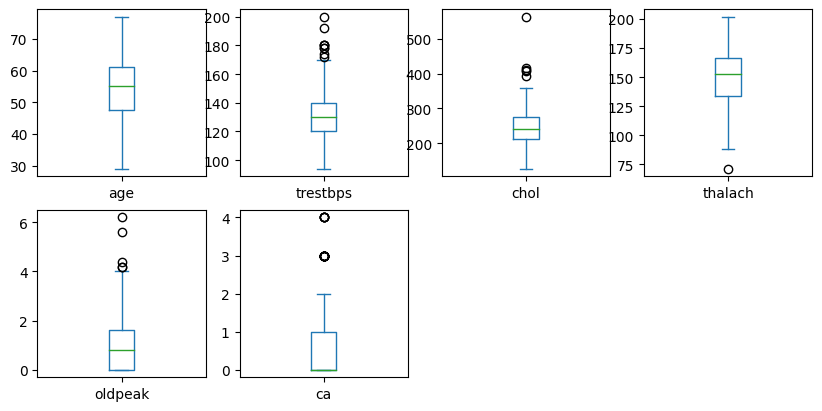

In [ ]:
df.plot(kind = "box" , subplots = True , figsize = (10,10) , layout = (4,4))

- **From the box plot, we can observe that numerical features with outliers are oldpeak, chol, ca, trestbps, thalach**

In [ ]:
df_out.shape

(287, 15)

In [ ]:
z_scores = (df - df.mean()) / df.std()

threshold = 3

outlier_mask = np.abs(z_scores) > threshold

df_out = df[~outlier_mask.any(axis=1)]
df_out

age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope  ca  \
0     63   1  3       145   233   1       0      150     0      2.3     0   0   
1     37   1  2       130   250   0       1      187     0      3.5     0   0   
2     41   0  1       130   204   0       0      172     0      1.4     2   0   
3     56   1  1       120   236   0       1      178     0      0.8     2   0   
4     57   0  0       120   354   0       1      163     1      0.6     2   0   
..   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ...  ..   
298   57   0  0       140   241   0       1      123     1      0.2     1   0   
299   45   1  3       110   264   0       1      132     0      1.2     1   0   
300   68   1  0       144   193   1       1      141     0      3.4     1   2   
301   57   1  0       130   131   0       1      115     1      1.2     1   1   
302   57   0  1       130   236   0       0      174     0      0.0     1   1   

    thal target  
0      1      1  
1      2      1  
2      2      1  
3      2      1  
4      2      1  
..   ...    ...  
298    3      0  
299    3      0  
300    3      0  
301    3      0  
302    2      0  

[287 rows x 14 columns]

age            Axes(0.125,0.712609;0.168478x0.167391)
trestbps    Axes(0.327174,0.712609;0.168478x0.167391)
chol        Axes(0.529348,0.712609;0.168478x0.167391)
thalach     Axes(0.731522,0.712609;0.168478x0.167391)
oldpeak        Axes(0.125,0.511739;0.168478x0.167391)
ca          Axes(0.327174,0.511739;0.168478x0.167391)
dtype: object

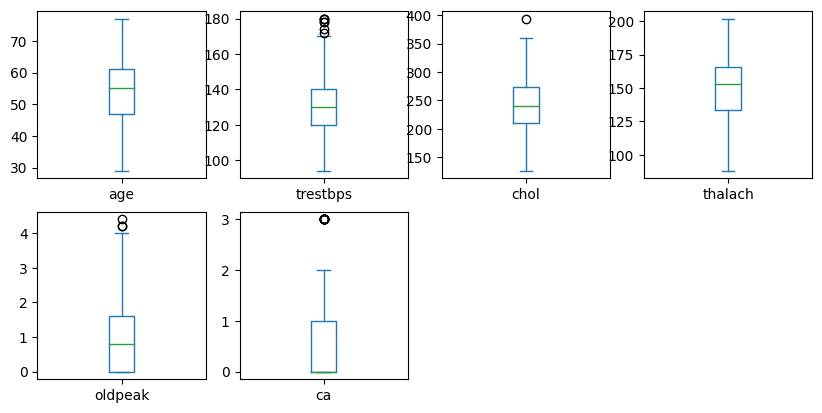

In [ ]:
df_out.plot(kind = "box" , subplots = True , figsize = (10,10) , layout = (4,4))

- **After removing outliers we need to plot the distribution of variables before and after removing outliers**

Text(0.5, 1.0, 'KDE Plot after dropping outlier values')

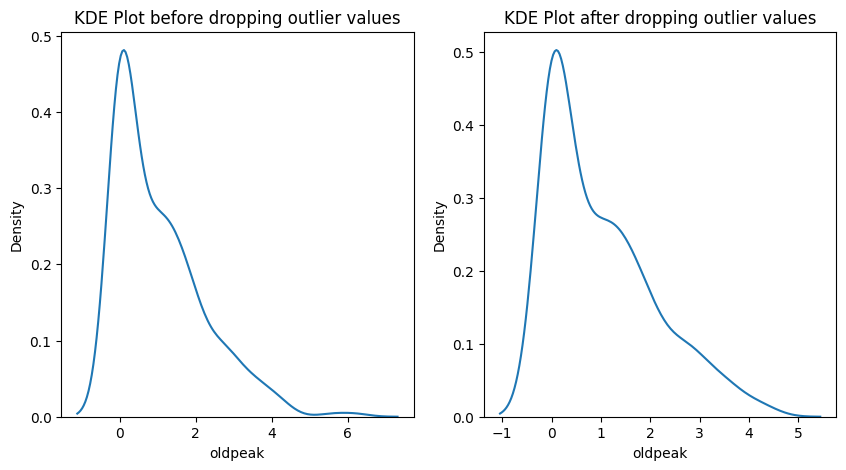

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['oldpeak'], ax = axes[0])
axes[0].set_title("KDE Plot before dropping outlier values")
sns.kdeplot(df_out['oldpeak'],ax = axes[1])
axes[1].set_title("KDE Plot after dropping outlier values")

Text(0.5, 1.0, 'KDE Plot after dropping outlier values')

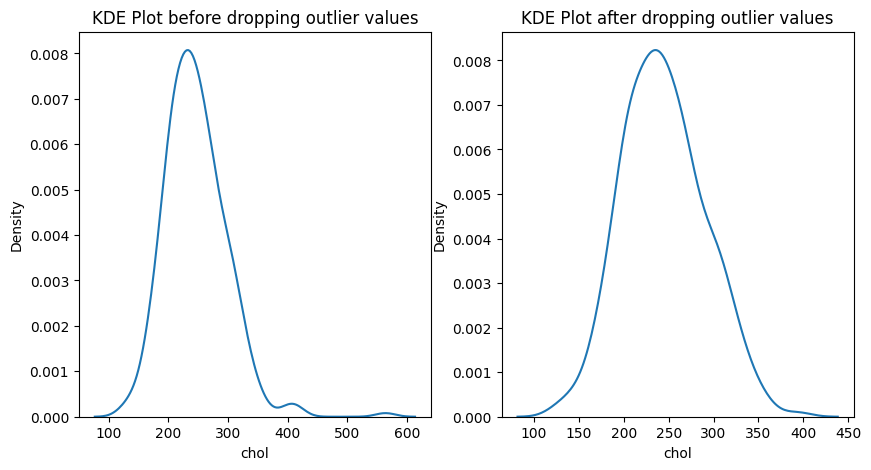

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['chol'], ax = axes[0])
axes[0].set_title("KDE Plot before dropping outlier values")
sns.kdeplot(df_out['chol'],ax = axes[1])
axes[1].set_title("KDE Plot after dropping outlier values")

Text(0.5, 1.0, 'KDE Plot after dropping outlier values')

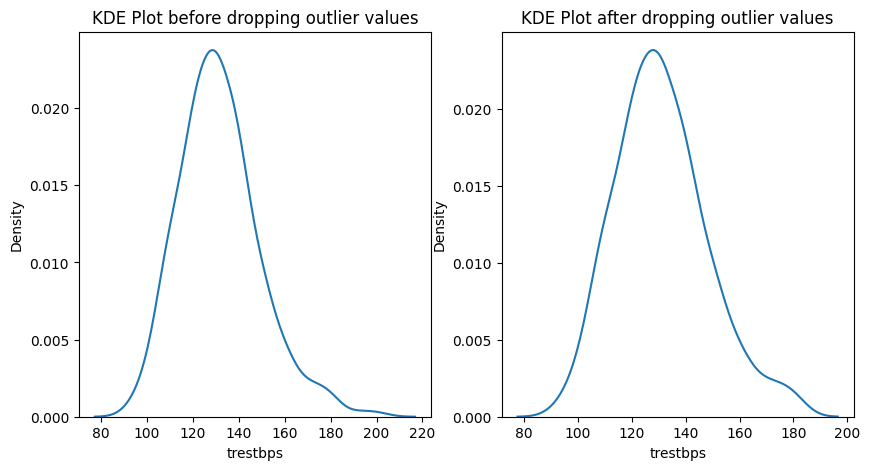

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['trestbps'], ax = axes[0])
axes[0].set_title("KDE Plot before dropping outlier values")
sns.kdeplot(df_out['trestbps'],ax = axes[1])
axes[1].set_title("KDE Plot after dropping outlier values")

Text(0.5, 1.0, 'KDE Plot after dropping outlier values')

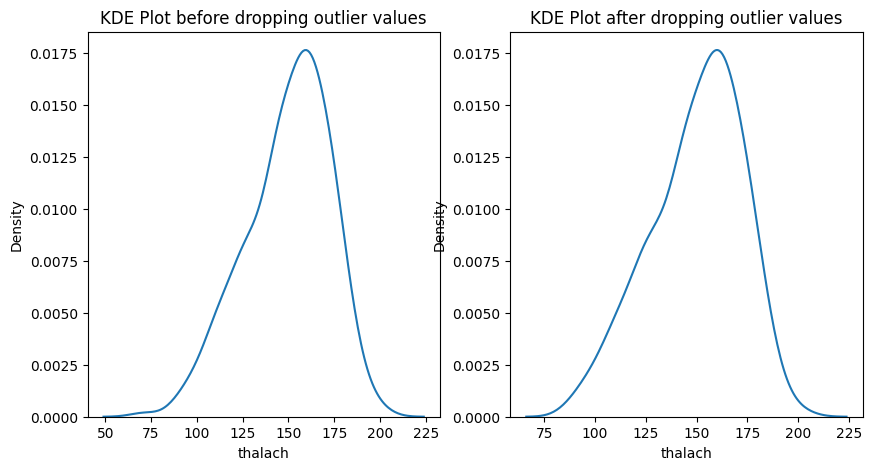

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['thalach'], ax = axes[0])
axes[0].set_title("KDE Plot before dropping outlier values")
sns.kdeplot(df_out['thalach'],ax = axes[1])
axes[1].set_title("KDE Plot after dropping outlier values")

## Correlation between features

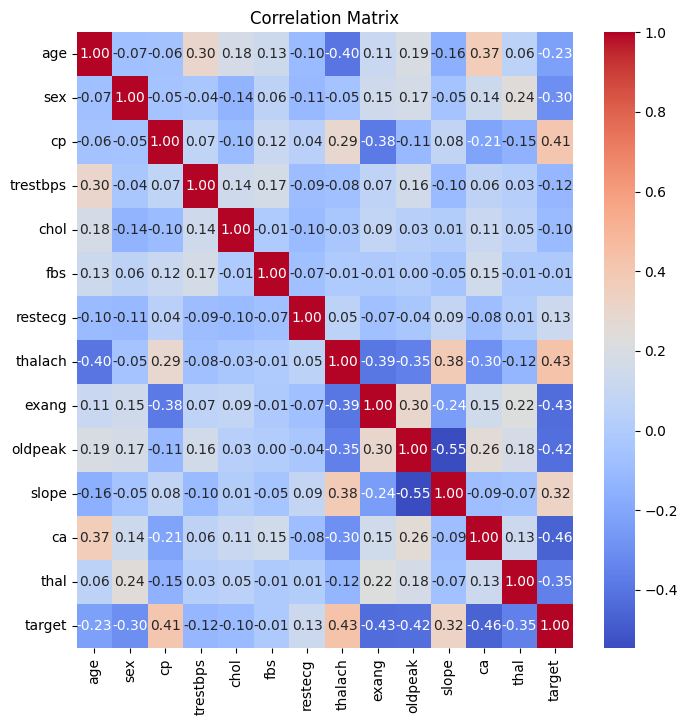

In [ ]:
from scipy import stats
import numpy as np
plt.figure(figsize=(8, 8))
sns.heatmap(df_out.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_target = df_out.corr()['target']
corr_target = corr_target.sort_values(ascending = False)
corr_target.reset_index()

index    target
0     target  1.000000
1    thalach  0.431519
2         cp  0.408570
3      slope  0.323948
4    restecg  0.130079
5        fbs -0.011438
6       chol -0.099821
7   trestbps -0.119281
8        age -0.226750
9        sex -0.302926
10      thal -0.354579
11   oldpeak -0.424443
12     exang -0.429082
13        ca -0.463258

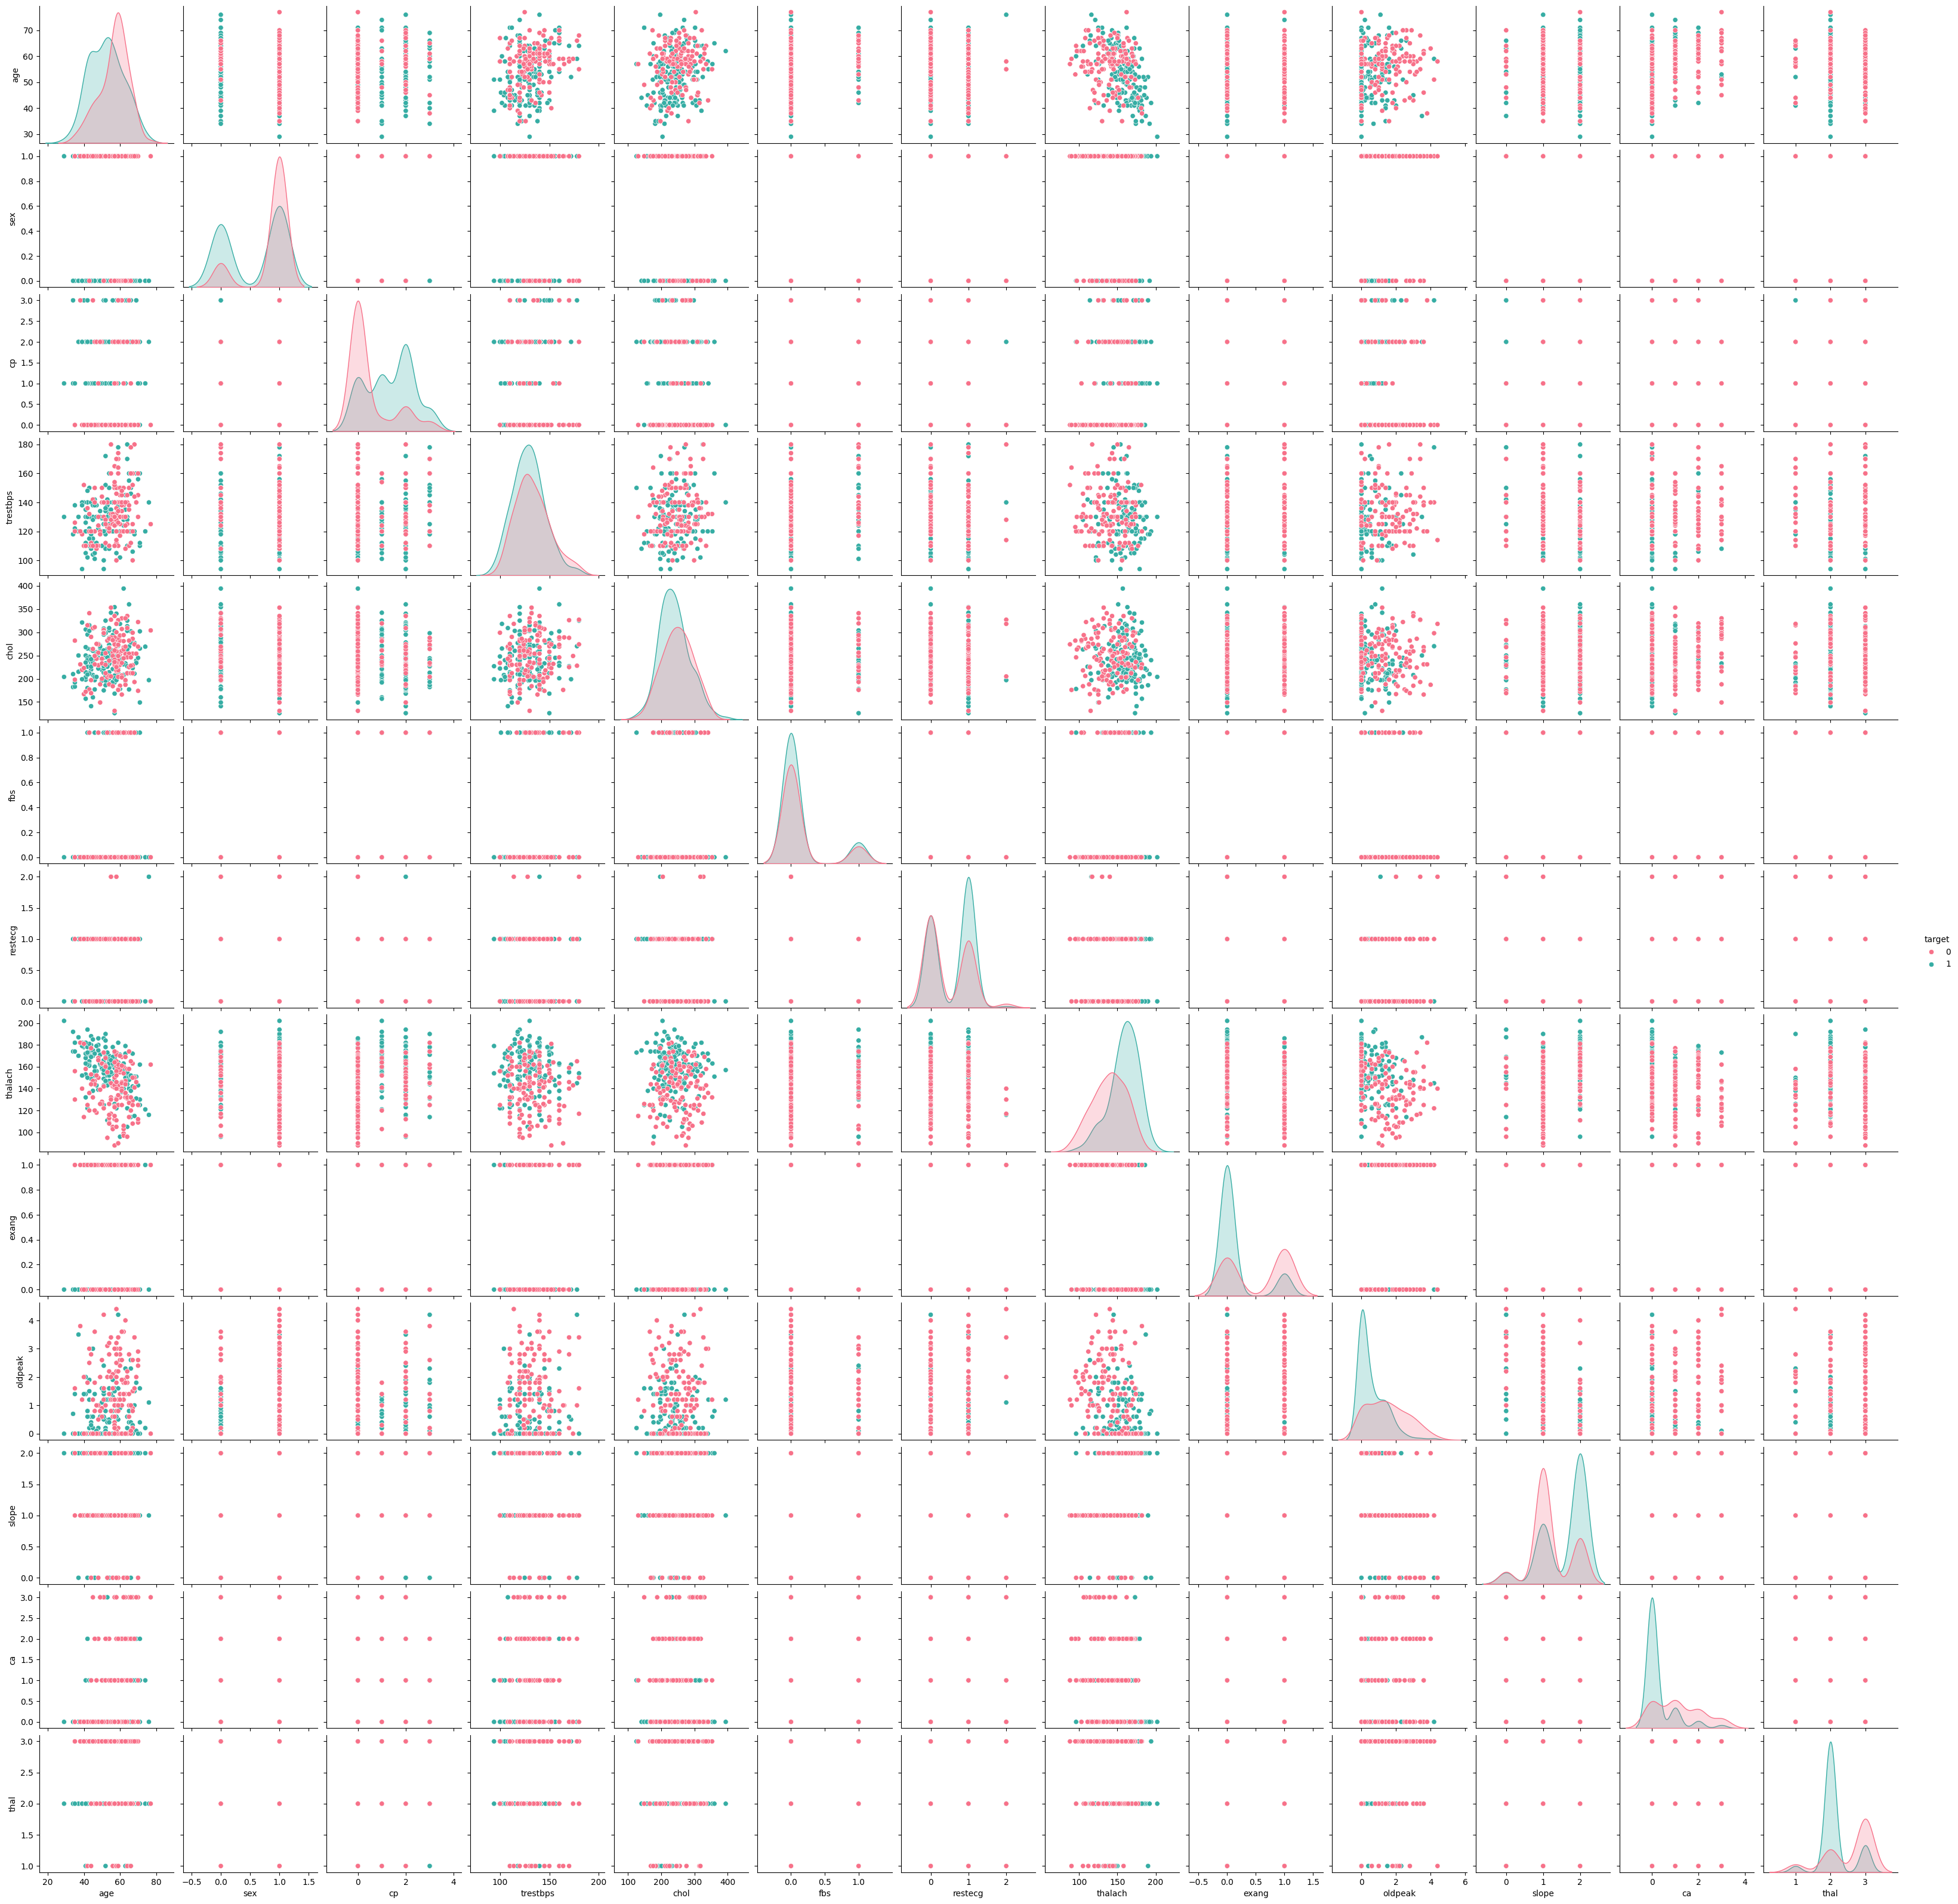

In [ ]:
sns.pairplot(df_out, hue='target', diag_kind='kde', palette='husl')
plt.show()

In [ ]:
df_out.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

In [ ]:
numerical_df = df_out.select_dtypes(include='number')

correlation_matrix = numerical_df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        print(f"Correlation between '{feature1}' and '{feature2}': {correlation_value}")


Correlation between 'age' and 'trestbps': 0.30470200884475757
Correlation between 'age' and 'chol': 0.17719231276056455
Correlation between 'age' and 'thalach': -0.40006749139803816
Correlation between 'age' and 'oldpeak': 0.19343132129893892
Correlation between 'age' and 'ca': 0.36876357981181407
Correlation between 'trestbps' and 'chol': 0.14358553543533376
Correlation between 'trestbps' and 'thalach': -0.07505938436521191
Correlation between 'trestbps' and 'oldpeak': 0.15698820912683947
Correlation between 'trestbps' and 'ca': 0.057946731487697176
Correlation between 'chol' and 'thalach': -0.030874457912735027
Correlation between 'chol' and 'oldpeak': 0.032452498935461205
Correlation between 'chol' and 'ca': 0.1132382124977032
Correlation between 'thalach' and 'oldpeak': -0.35344132107180665
Correlation between 'thalach' and 'ca': -0.2971536945589155
Correlation between 'oldpeak' and 'ca': 0.26060009660305355


- age have a high negative correlation with thalach

- **From the correlation matrix, we can observe that the features that are highly correlated with the target are : ca, oldpeak, exang, cp, thalach.**
- **Where cp and thalach are positively correlated with the target while ca, oldpeak and exang are negatively correlated with the target**   

## How is Target affected by gender?

(-1.1868626576242736,
 1.104135737230658,
 -1.1589893558595732,
 1.1028090169456757)

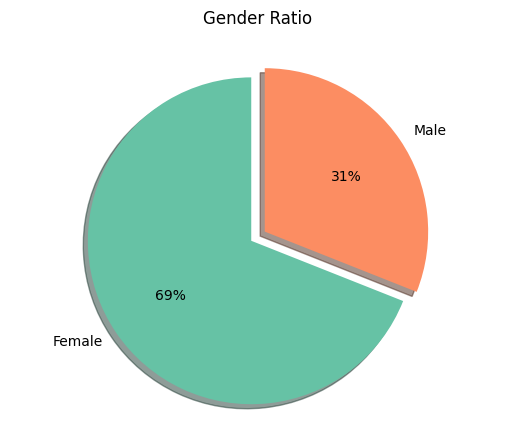

In [ ]:
df_out['sex_mapped'] = df_out['sex'].map({0: 'Male', 1: 'Female'})
colors = ['#66c2a5', '#fc8d62']
explode = (0.1, 0)

df_out['sex_mapped'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=90, colors=colors, explode=explode, shadow=True)

plt.title('Gender Ratio', pad=20)
plt.ylabel('')

plt.axis('equal')

**Pie chart observation**: The pie chart shows that the higher majority in this dataset is females.

In [ ]:
df_out[['target','sex']]

target sex
0        1   1
1        1   1
2        1   0
3        1   1
4        1   0
..     ...  ..
298      0   0
299      0   1
300      0   1
301      0   1
302      0   0

[287 rows x 2 columns]

In [ ]:
## assuming that 1 -> female , 0-> male
value_counts_male=df_out[df_out['sex']==0]['target'].value_counts()
value_counts_male

target
1    69
0    20
Name: count, dtype: int64

In [ ]:
value_counts_female=df_out[df_out['sex']==1]['target'].value_counts()
value_counts_female

target
0    109
1     89
Name: count, dtype: int64

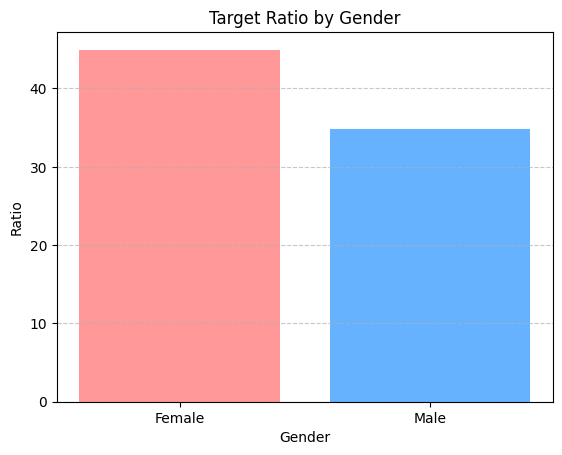

In [ ]:
ratio_yes_female =value_counts_female[1]/df_out['sex'].value_counts()[1]*100
ratio_yes_male =value_counts_male[1]/df_out['sex'].value_counts()[1]*100
ratio = [ratio_yes_female, ratio_yes_male]
labels = ['Female', 'Male']

colors = ['#FF9999', '#66B2FF']
fig, ax = plt.subplots()
bars = ax.bar(labels, ratio, color=colors)


plt.title('Target Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio')


ax.yaxis.grid(True, linestyle='--', alpha=0.7)

- **From the bar plot, it is obvious that percentage of females that have heart disease is higher than males**



## chi square test to check independence of both categorical variables:



In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_out['sex'], df_out['target'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square value: 25.03618240864609
p-value: 5.62645102432648e-07
Degrees of freedom: 1
Expected frequencies: [[ 40.00348432  48.99651568]
 [ 88.99651568 109.00348432]]


In [ ]:
contingency_table

target    0   1
sex            
0        20  69
1       109  89

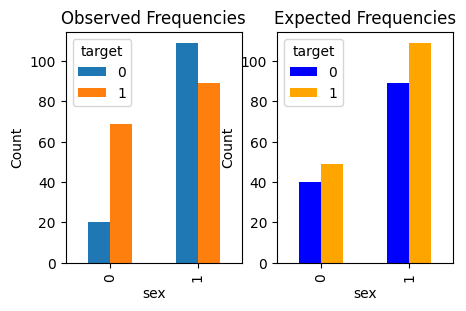

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(5, 3))
contingency_table.plot(kind='bar', ax=ax)
ax.set_ylabel('Count')
ax.set_title('Observed Frequencies')
ax.legend(title='target')

expected_counts = pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index)
expected_counts.plot(kind='bar', ax=ax2, color=['blue', 'orange'])
ax2.set_ylabel('Count')
ax2.set_title('Expected Frequencies')
ax2.legend(title='target')

plt.show()

 - **Chi-square test Observations:** based on the chi square test it seems that there is a significant association between gender and heart disease in the given data. Because based on the low p-value (2.6473108686330533e-07), we can conclude that there is a significant association between gender and heart disease. This means that gender is not independent of heart disease status, and there is a relationship between the two variables.

# How does Age affect heart disease?

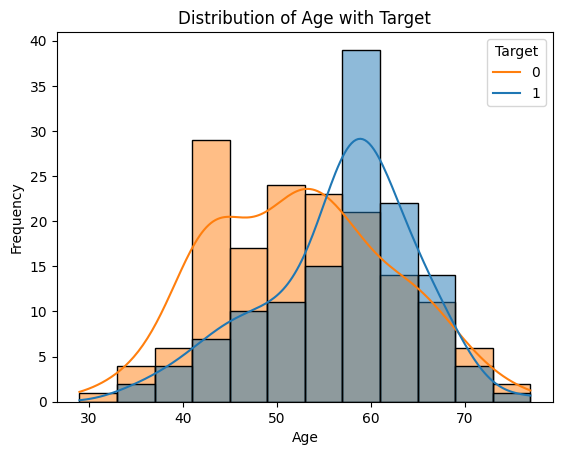

In [ ]:
sns.histplot(data=df_out, x='age', hue='target', kde=True)
plt.title('Distribution of Age with Target')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['0', '1'])
plt.show()

:**Kde plot Observation**: The density plot suggests that the majority of ages in this dataset that has heart disease fall within the range of 60

In [ ]:
df_out['age'].value_counts()

age
58    18
57    17
54    15
59    14
51    12
44    11
52    11
60    11
62    10
41    10
64    10
56     9
45     8
61     8
42     8
63     8
55     7
43     7
67     7
50     7
53     7
65     7
46     7
48     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
38     1
Name: count, dtype: int64

In [ ]:
filtered_ages = df_out['age'].value_counts()[df_out['age'].value_counts() != 1].index

df_out_filtered = df_out[df_out['age'].isin(filtered_ages)]

In [ ]:
df_out_filtered.head()

age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope  ca  \
0   63   1  3       145   233   1       0      150     0      2.3     0   0   
1   37   1  2       130   250   0       1      187     0      3.5     0   0   
2   41   0  1       130   204   0       0      172     0      1.4     2   0   
3   56   1  1       120   236   0       1      178     0      0.8     2   0   
4   57   0  0       120   354   0       1      163     1      0.6     2   0   

  thal target sex_mapped  
0    1      1     Female  
1    2      1     Female  
2    2      1       Male  
3    2      1     Female  
4    2      1       Male

In [ ]:
Age_target= df_out_filtered.groupby(['age'])['target'].value_counts().reset_index().sort_values('count',ascending=False)
Age_target= Age_target[Age_target['target']==1]
Age_target

age  target  count
34   54       1     10
28   51       1      9
8    41       1      9
30   52       1      8
14   44       1      8
41   57       1      7
10   42       1      7
54   64       1      6
43   58       1      6
16   45       1      6
38   56       1      5
12   43       1      5
32   53       1      5
45   59       1      5
26   50       1      4
18   46       1      4
22   48       1      4
51   62       1      4
58   66       1      4
47   60       1      3
53   63       1      3
57   65       1      3
68   71       1      3
37   55       1      3
24   49       1      3
20   47       1      3
4    39       1      3
64   69       1      2
62   68       1      2
61   67       1      2
3    37       1      2
1    35       1      2
0    34       1      2
7    40       1      1
49   61       1      1
67   70       1      1

In [ ]:
Age_target['percentage']= Age_target['count'] / (df_out['age'].value_counts())[Age_target['age']].values*100

In [ ]:
Age_target= Age_target.sort_values('percentage', ascending = False)
Age_target

age  target  count  percentage
3    37       1      2  100.000000
0    34       1      2  100.000000
68   71       1      3  100.000000
8    41       1      9   90.000000
10   42       1      7   87.500000
28   51       1      9   75.000000
16   45       1      6   75.000000
4    39       1      3   75.000000
30   52       1      8   72.727273
14   44       1      8   72.727273
12   43       1      5   71.428571
32   53       1      5   71.428571
64   69       1      2   66.666667
34   54       1     10   66.666667
54   64       1      6   60.000000
20   47       1      3   60.000000
24   49       1      3   60.000000
58   66       1      4   57.142857
22   48       1      4   57.142857
18   46       1      4   57.142857
26   50       1      4   57.142857
38   56       1      5   55.555556
62   68       1      2   50.000000
1    35       1      2   50.000000
57   65       1      3   42.857143
37   55       1      3   42.857143
41   57       1      7   41.176471
51   62       1      4   40.000000
53   63       1      3   37.500000
45   59       1      5   35.714286
43   58       1      6   33.333333
7    40       1      1   33.333333
61   67       1      2   28.571429
47   60       1      3   27.272727
67   70       1      1   25.000000
49   61       1      1   12.500000

In [ ]:
Age_target['percentage']= Age_target['percentage'].astype(int)
Age_target

age  target  count  percentage
3    37       1      2         100
0    34       1      2         100
68   71       1      3         100
8    41       1      9          90
10   42       1      7          87
28   51       1      9          75
16   45       1      6          75
4    39       1      3          75
30   52       1      8          72
14   44       1      8          72
12   43       1      5          71
32   53       1      5          71
64   69       1      2          66
34   54       1     10          66
54   64       1      6          60
20   47       1      3          60
24   49       1      3          60
58   66       1      4          57
22   48       1      4          57
18   46       1      4          57
26   50       1      4          57
38   56       1      5          55
62   68       1      2          50
1    35       1      2          50
57   65       1      3          42
37   55       1      3          42
41   57       1      7          41
51   62       1      4          40
53   63       1      3          37
45   59       1      5          35
43   58       1      6          33
7    40       1      1          33
61   67       1      2          28
47   60       1      3          27
67   70       1      1          25
49   61       1      1          12

In [ ]:
plt.figure(figsize=(3, 5))

fig = px.violin(Age_target, x='target', y='percentage', box=True, color='target', color_discrete_map={1: 'green', 0: 'blue'})
fig.show()


<Figure size 300x500 with 0 Axes>

**Violin plot observation: Wider sections indicate higher density which means that age lying between 40 and 60 are more likely to have heart diseases.**

Text(0.5, 1.0, 'Age vs Percentage of Heart Disease')

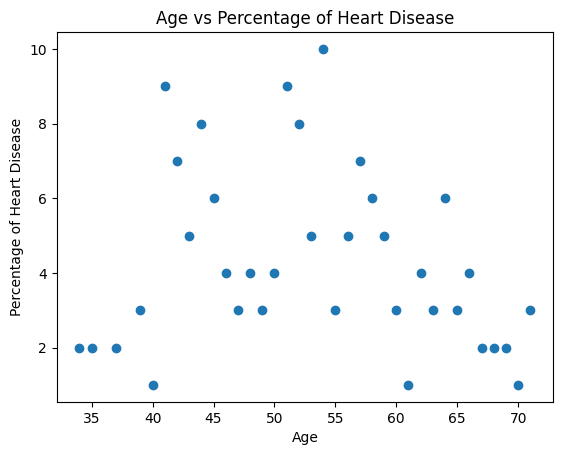

In [ ]:


plt.scatter(Age_target['age'], Age_target['count'])

plt.xlabel('Age')
plt.ylabel('Percentage of Heart Disease')
plt.title('Age vs Percentage of Heart Disease')


**Scatter plot observation**: The data is not uniformly scattered which means that there is no direct relation between age and percentage of people with that age that have heart diseases, because as apparent from the plot people between ages 40 and 60 have the highest count in heart diseases while younger or older have less count

## How does the chest pain type (cp) differ between individuals with and without heart disease?

In [ ]:
with_disease = df_out[df_out['target'] == 1]
without_disease = df_out[df_out['target'] == 0]

In [ ]:
with_disease_counts = with_disease['cp'].value_counts().sort_index()
without_disease_counts = without_disease['cp'].value_counts().sort_index()

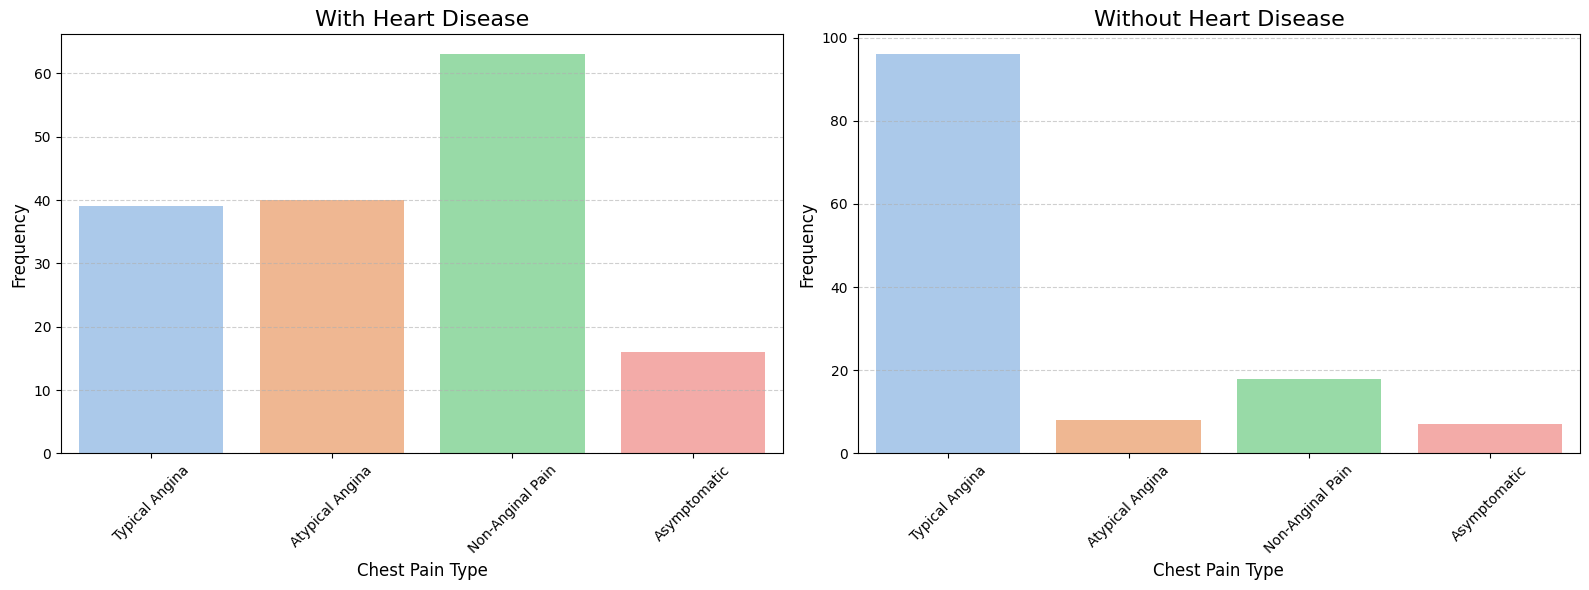

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

colors = sns.color_palette("pastel")

sns.barplot(x=with_disease_counts.index, y=with_disease_counts.values, ax=ax[0], palette=colors)
ax[0].set_title('With Heart Disease', fontsize=16)
ax[0].set_xlabel('Chest Pain Type', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.6)
ax[0].set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], rotation=45)

sns.barplot(x=without_disease_counts.index, y=without_disease_counts.values, ax=ax[1], palette=colors)
ax[1].set_title('Without Heart Disease', fontsize=16)
ax[1].set_xlabel('Chest Pain Type', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.6)
ax[1].set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], rotation=45)

plt.tight_layout()
plt.show()

**The plot indicates that the frequency of individuals diagnosed with Typical Angina is higher in the group without heart disease, which is expected. Conversely, Non-Anginal Pain appears to be more common among individuals with heart disease.**

## What is the distribution of cholesterol levels (chol) among individuals with and without heart disease?

In [ ]:
with_disease['chol']

0      233
1      250
2      204
3      236
4      354
      ... 
157    192
159    221
160    240
161    342
162    157
Name: chol, Length: 158, dtype: int64

In [ ]:
without_disease['chol']

165    286
166    229
167    268
168    254
169    203
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 129, dtype: int64

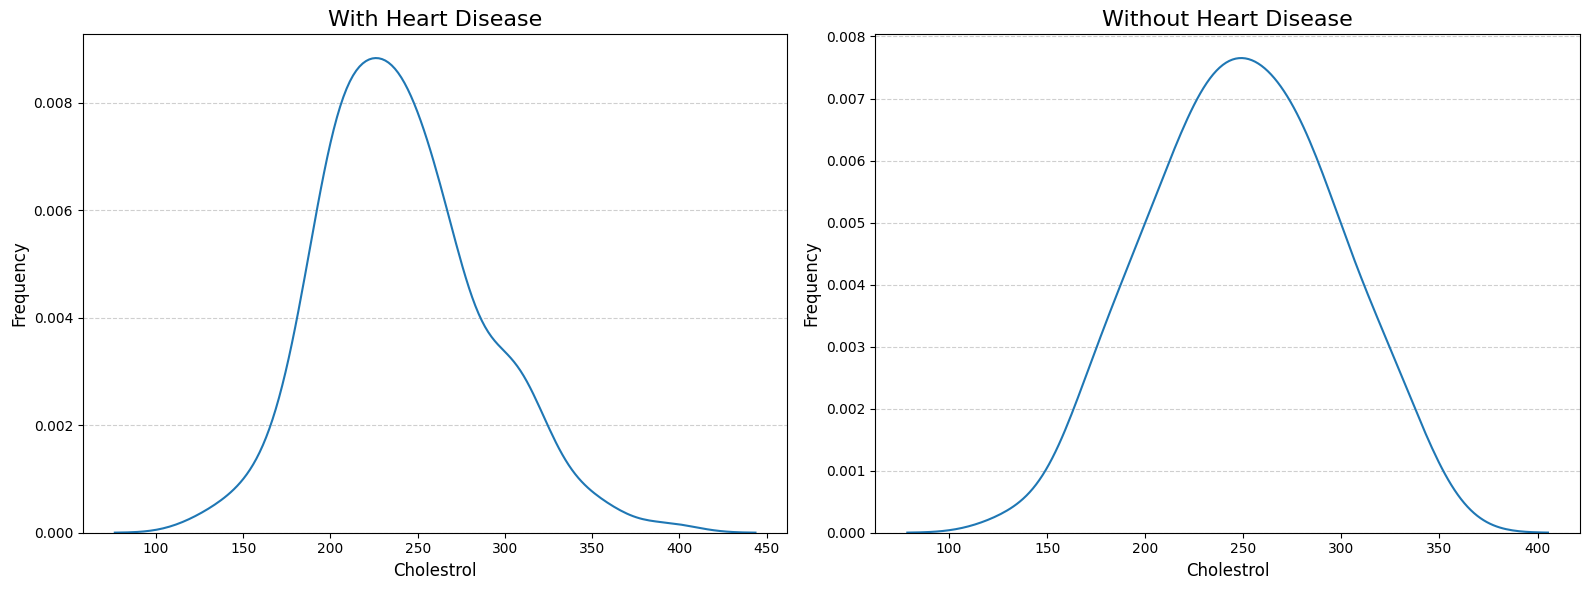

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

colors = sns.color_palette("pastel")

sns.kdeplot( with_disease['chol'],ax=ax[0], palette=colors)
ax[0].set_title('With Heart Disease', fontsize=16)
ax[0].set_xlabel('Cholestrol', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.6)

sns.kdeplot(without_disease['chol'], ax=ax[1], palette=colors)
ax[1].set_title('Without Heart Disease', fontsize=16)
ax[1].set_xlabel('Cholestrol', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Cholestrol levels appear to be more frequent between 200 and 250 in both cases**

## What is the overall percentage of patients in the dataset who have heart disease?

In [ ]:

total_patients = df_out.shape[0]
patients_with_heart_disease = df_out[df_out['target'] == 1].shape[0]
percentage_with_heart_disease = (patients_with_heart_disease / total_patients) * 100
print(f"Percentage of patients with heart disease: {percentage_with_heart_disease:.2f}%")


Percentage of patients with heart disease: 55.05%


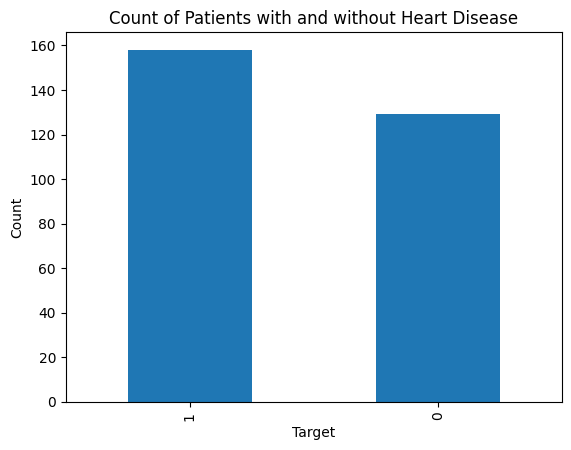

In [ ]:
df_out['target'].value_counts().plot(kind='bar')
plt.title('Count of Patients with and without Heart Disease')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


## Distribution of all numerical variables




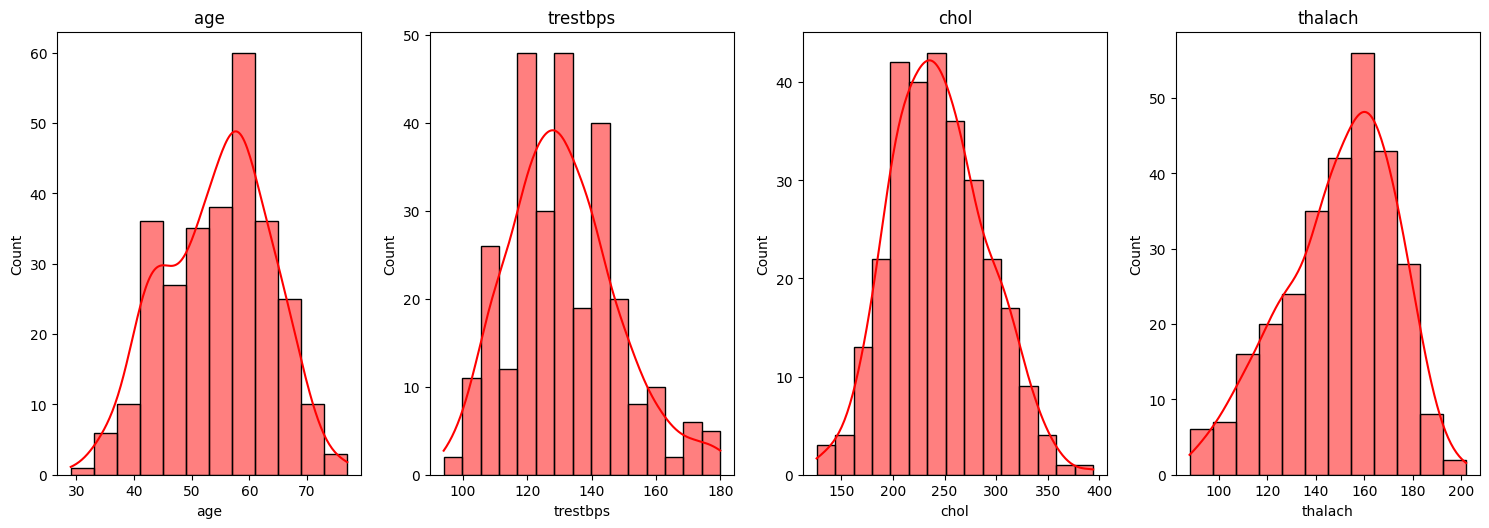

In [ ]:
num_features = len(df_out.columns[:-1])

num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

plt.figure(figsize=(15, 5 * num_rows))
numerical_columns_unique = [col for col in df_out if df_out[col].nunique() > 4]
df_num = df_out[numerical_columns_unique]
for i, column in enumerate(df_num.columns[:-1]):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df_num[column], kde=True,color= 'red')
    plt.title(column)
plt.tight_layout()
plt.show()

## What is the Maximum heart rate achieved vs age and gender?

Text(0.5, 1.0, 'Line Plot of Maximum Heart Rate vs Age')

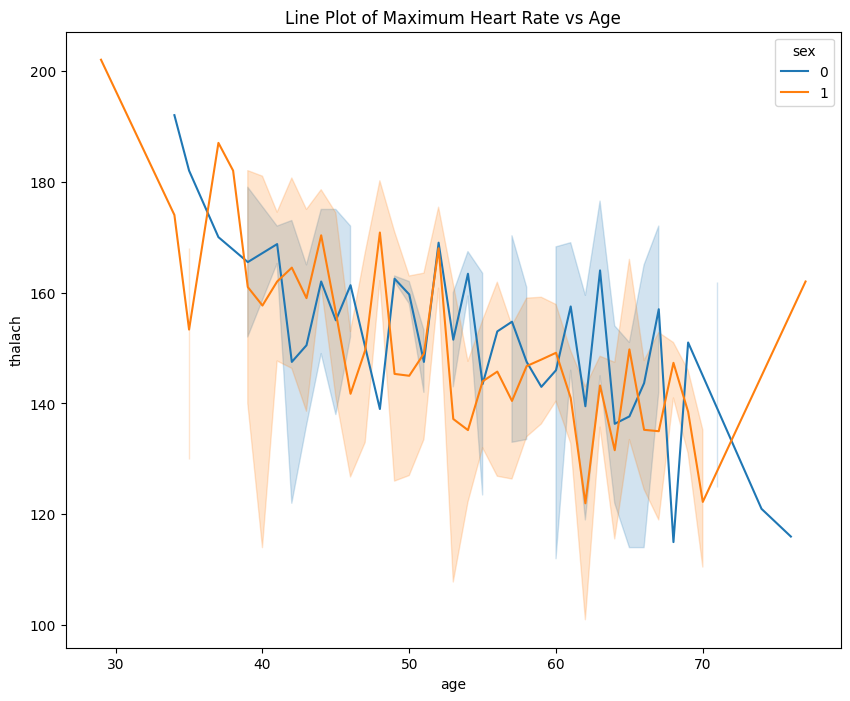

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='thalach', data=df_out, hue='sex')
plt.title('Line Plot of Maximum Heart Rate vs Age')

**As age increases, maximum heart rate decreases and also females and males have a similar trend except between age 60-70 where maximum heart rate increases in females and decreases in males**

## What is the distribution of maximum heart rate (thalach) across different target groups in the dataset?

Text(0.5, 1.0, 'Bar Plot of Maximum Heart Rate vs Target')

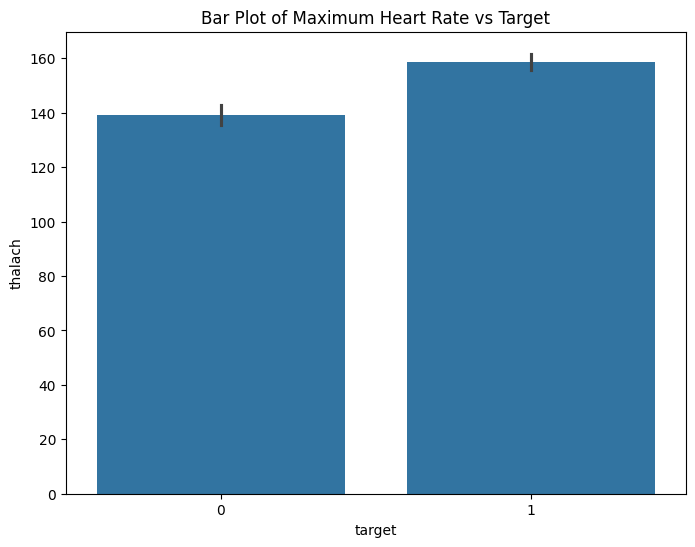

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='thalach', data=df_out)
plt.title('Bar Plot of Maximum Heart Rate vs Target')

**groups diagnosed with heart disease have higher maximum heart rate**

## What is the relationship between age groups and cholestrol levels?

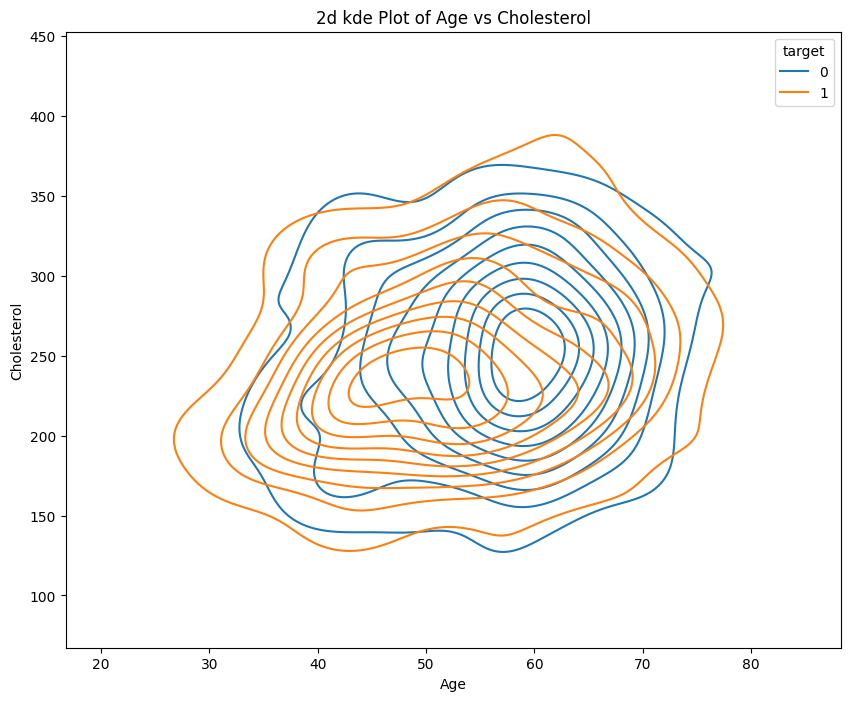

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x='age', y='chol', data=df_out, hue='target',)
plt.title('2d kde Plot of Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

**The dense areas in the 2d kde plot, show a higher density of people. This suggests that there are more people diagnosed with heart disease with cholesterol levels in the normal range (generally below 200 mg/dL) at ages between (40 -50), and more people not diagnosed with heart disease with chol level between (200-300) at ages between (50-70).**

# Phase 2



## One Hot Encoding

In [ ]:
 #Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df_out, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age             int64
sex             int64
trestbps        int64
chol            int64
fbs             int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca              int64
target          int64
sex_mapped     object
cp_1             bool
cp_2             bool
cp_3             bool
restecg_1        bool
restecg_2        bool
thal_2           bool
thal_3           bool
dtype: object

In [ ]:
df_encoded = df_encoded.drop(columns=["sex_mapped"])

In [ ]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
df_encoded

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  \
0     63    1       145   233    1      150      0      2.3      0   0   
1     37    1       130   250    0      187      0      3.5      0   0   
2     41    0       130   204    0      172      0      1.4      2   0   
3     56    1       120   236    0      178      0      0.8      2   0   
4     57    0       120   354    0      163      1      0.6      2   0   
..   ...  ...       ...   ...  ...      ...    ...      ...    ...  ..   
298   57    0       140   241    0      123      1      0.2      1   0   
299   45    1       110   264    0      132      0      1.2      1   0   
300   68    1       144   193    1      141      0      3.4      1   2   
301   57    1       130   131    0      115      1      1.2      1   1   
302   57    0       130   236    0      174      0      0.0      1   1   

     target   cp_1   cp_2   cp_3  restecg_1  restecg_2  thal_2  thal_3  
0         1  False  False   True      False      False   False   False  
1         1  False   True  False       True      False    True   False  
2         1   True  False  False      False      False    True   False  
3         1   True  False  False       True      False    True   False  
4         1  False  False  False       True      False    True   False  
..      ...    ...    ...    ...        ...        ...     ...     ...  
298       0  False  False  False       True      False   False    True  
299       0  False  False   True       True      False   False    True  
300       0  False  False  False       True      False   False    True  
301       0  False  False  False       True      False   False    True  
302       0   True  False  False      False      False    True   False  

[287 rows x 18 columns]

## Balancing data using Random over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

## Feature importance using Random Forest

ca: 0.1281
thalach: 0.1238
oldpeak: 0.1022
thal_2: 0.0993
thal_3: 0.0936
age: 0.0831
chol: 0.0823
trestbps: 0.0701
exang: 0.0561
slope: 0.0411
sex: 0.0313
cp_2: 0.0292
restecg_1: 0.0193
cp_3: 0.0186
cp_1: 0.0122
fbs: 0.0086
restecg_2: 0.0011


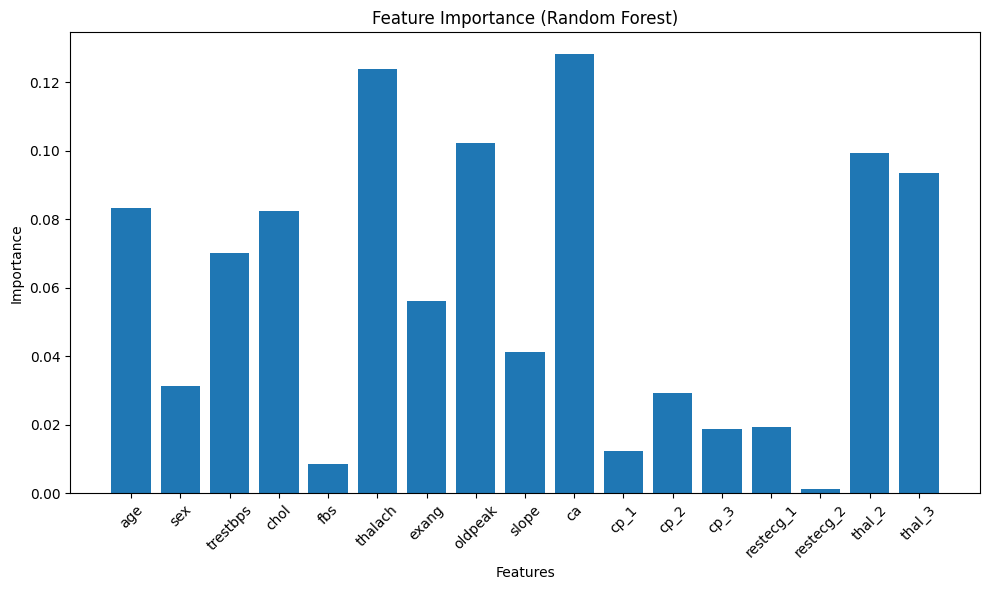

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
feature_names = list(X.columns)  # Assuming feature names are in column names
sorted_idx = feature_importances.argsort()[::-1]  # Descending order
for i, idx in enumerate(sorted_idx):
    print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Splitting using Holdout Validation technique

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_test.head()

age  sex  trestbps  chol  fbs  thalach  exang   oldpeak  slope  ca  \
134   57    1       110   201    0      126      1  1.500000      1   0   
287   46    1       118   281    0      159      0  0.262387      1   0   
55    45    1       115   260    0      185      0  0.000000      2   0   
254   54    1       122   286    0      116      1  3.200000      1   2   
276   58    0       170   225    1      146      1  2.800000      1   2   

      cp_1   cp_2   cp_3  restecg_1  restecg_2  thal_2  thal_3  
134  False  False  False       True      False   False   False  
287  False  False  False      False      False    True    True  
55   False  False  False      False      False    True   False  
254  False  False  False      False      False    True   False  
276  False  False  False      False      False   False   False

## Transforming Numerical features to a normal distribution

In [ ]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


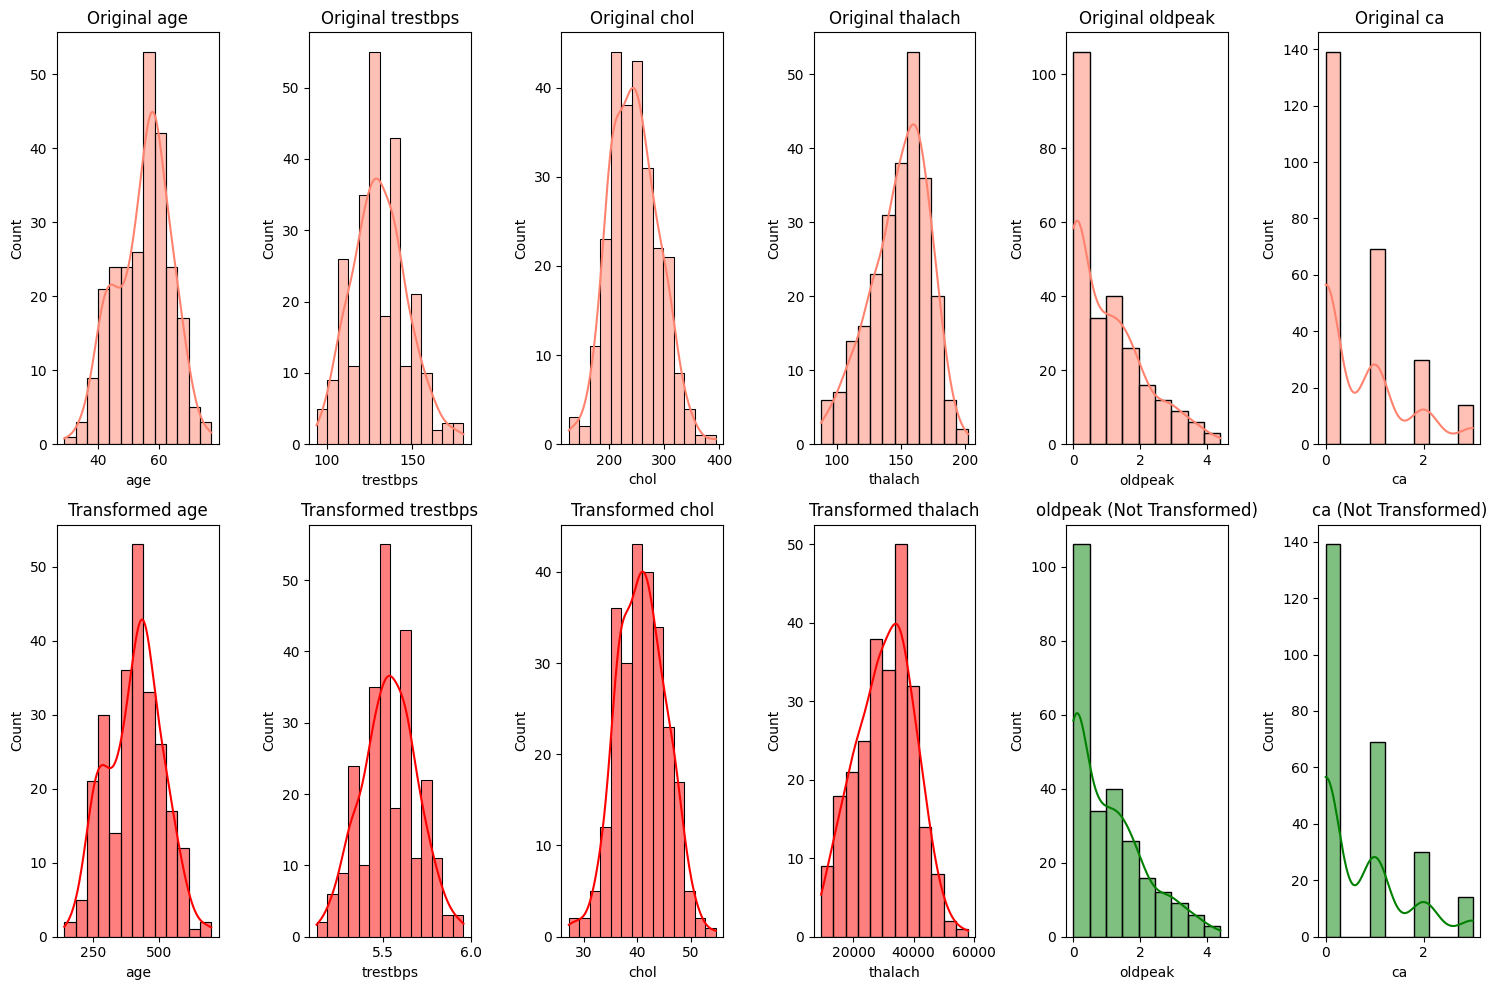

In [ ]:
fig, ax = plt.subplots(2, len(continuous_features), figsize=(15,10))

for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')


# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

# Models and Hyperparam Tuning

In [ ]:
dt_base = DecisionTreeClassifier(random_state=0)

In medical scenarios, especially in the context of diagnosing illnesses, it's often more important to have a high recall (sensitivity) for the positive class (patients with the condition). A high recall ensures that most of the actual positive cases are correctly identified, even if it means some false positives (cases where healthy individuals are misclassified as having the condition). The rationale is that it's generally better to have a few false alarms than to miss out on diagnosing a patient with a potential illness.

establishing a function to determine the optimal set of hyperparameters that yield the highest recall for the model. This approach ensures a reusable framework for hyperparameter tuning of subsequent models:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest recall for class 1 is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = RandomizedSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters


In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2]
}
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'entropy'}


In [ ]:
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       125
           1       0.86      0.82      0.84       127

    accuracy                           0.84       252
   macro avg       0.84      0.84      0.84       252
weighted avg       0.84      0.84      0.84       252



In [ ]:
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.74      0.84      0.79        31

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.79      0.78      0.78        64



Given that the metric values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)

    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
DT         0.83         0.74      0.73      0.84  0.77  0.79   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
DT                 0.79              0.78          0.78      0.78

In [ ]:
rf_base = RandomForestClassifier(random_state=0)

In [ ]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 2, 'criterion': 'entropy', 'bootstrap': False}


In [ ]:
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       125
           1       0.82      0.81      0.82       127

    accuracy                           0.82       252
   macro avg       0.82      0.82      0.82       252
weighted avg       0.82      0.82      0.82       252



In [ ]:
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        33
           1       0.70      0.68      0.69        31

    accuracy                           0.70        64
   macro avg       0.70      0.70      0.70        64
weighted avg       0.70      0.70      0.70        64



The RF model's similar performance on both training and test data suggests it isn't overfitting.

In [ ]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
RF         0.71          0.7      0.73      0.68  0.72  0.69   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
RF                  0.7               0.7           0.7       0.7

In [ ]:
from sklearn.preprocessing import RobustScaler

knn_pipeline = Pipeline([
    # ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__weights': 'uniform', 'knn__p': 2, 'knn__n_neighbors': 11}


In [ ]:
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       125
           1       0.71      0.76      0.73       127

    accuracy                           0.72       252
   macro avg       0.72      0.72      0.72       252
weighted avg       0.72      0.72      0.72       252



In [ ]:
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        33
           1       0.64      0.74      0.69        31

    accuracy                           0.67        64
   macro avg       0.68      0.67      0.67        64
weighted avg       0.68      0.67      0.67        64



The KNN model's consistent scores across training and test sets indicate no overfitting.

In [ ]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
KNN         0.71         0.64      0.61      0.74  0.66  0.69   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
KNN                 0.68              0.67          0.67      0.67

In [ ]:
df_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_2          bool
thal_3          bool
dtype: object

In [ ]:
X_train_svm, X_test_svm, y_train_svm , y_test_svm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

svm_pipeline = Pipeline([
     ('scaler', RobustScaler()),
    ('svm', SVC(probability=True))
])

In [ ]:

param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4]
}
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train_svm, y_train_svm)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__kernel': 'poly', 'svm__gamma': 'auto', 'svm__degree': 3, 'svm__C': 1}


In [ ]:
print(classification_report(y_train_svm, best_svm.predict(X_train_svm)))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62       125
           1       0.65      0.98      0.78       127

    accuracy                           0.72       252
   macro avg       0.80      0.72      0.70       252
weighted avg       0.80      0.72      0.70       252



In [ ]:
print(classification_report(y_test, best_svm.predict(X_test_svm)))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61        33
           1       0.62      0.97      0.76        31

    accuracy                           0.70        64
   macro avg       0.78      0.71      0.69        64
weighted avg       0.79      0.70      0.68        64



In [ ]:
svm_evaluation = evaluate_model(best_svm, X_test_svm, y_test_svm, 'SVM')
svm_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
SVM         0.94         0.62      0.45      0.97  0.61  0.76   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
SVM                 0.78              0.71          0.69       0.7

In [ ]:
LogReg_pipeline = Pipeline([
    # ('scaler', RobustScaler()),
    ('logreg', LogisticRegression())
    ]
                 )

In [ ]:
param_grid_logreg = {
    'logreg__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],  # Regularization parameter
    'logreg__penalty': ['l1', 'l2'],  # Regularization penalty ('l1' or 'l2')
    'logreg__solver': ['liblinear', 'saga', 'newton-cg'],  # Algorithm for optimization
    'logreg__max_iter': [100, 200, 300],  # Maximum number of iterations
}

best_logreg, best_logreg_hyperparams = tune_clf_hyperparameters(LogReg_pipeline, param_grid_logreg, X_train, y_train)
print('Logreg Optimal Hyperparameters: \n', best_logreg_hyperparams)

Logreg Optimal Hyperparameters: 
 {'logreg__solver': 'saga', 'logreg__penalty': 'l1', 'logreg__max_iter': 100, 'logreg__C': 0.05}


In [ ]:
print(classification_report(y_train, best_logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.12      0.21       125
           1       0.52      0.95      0.68       127

    accuracy                           0.54       252
   macro avg       0.62      0.54      0.44       252
weighted avg       0.62      0.54      0.44       252



In [ ]:
print(classification_report(y_test, best_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.12      0.21        33
           1       0.51      0.97      0.67        31

    accuracy                           0.53        64
   macro avg       0.65      0.54      0.44        64
weighted avg       0.66      0.53      0.43        64



In [ ]:
logreg_evaluation=evaluate_model(best_logreg, X_test, y_test, 'Logreg')
logreg_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
Logreg          0.8         0.51      0.12      0.97  0.21  0.67   

        macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
Logreg                 0.65              0.54          0.44      0.53

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb_model = XGBClassifier()
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_model, param_grid_xgb, X_train, y_train)
print('xgboost Optimal Hyperparameters: \n', best_xgb_hyperparams)

xgboost Optimal Hyperparameters: 
 {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
print(classification_report(y_train, best_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       125
           1       0.92      0.95      0.94       127

    accuracy                           0.94       252
   macro avg       0.94      0.94      0.94       252
weighted avg       0.94      0.94      0.94       252



In [ ]:
print(classification_report(y_test, best_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.75      0.77      0.76        31

    accuracy                           0.77        64
   macro avg       0.77      0.77      0.77        64
weighted avg       0.77      0.77      0.77        64



In [ ]:
xgb_evaluation=evaluate_model(best_xgb, X_test, y_test, 'xgb')
xgb_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
xgb         0.78         0.75      0.76      0.77  0.77  0.76   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
xgb                 0.77              0.77          0.77      0.77

In [ ]:
gb_model = GradientBoostingClassifier()
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
best_gb, best_gb_hyperparams = tune_clf_hyperparameters(gb_model, param_grid_gb, X_train, y_train)
print('gradient boost Optimal Hyperparameters: \n', best_gb_hyperparams)

gradient boost Optimal Hyperparameters: 
 {'subsample': 0.9, 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.05}


In [ ]:
print(classification_report(y_train, best_gb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       125
           1       0.96      0.98      0.97       127

    accuracy                           0.97       252
   macro avg       0.97      0.97      0.97       252
weighted avg       0.97      0.97      0.97       252



In [ ]:
print(classification_report(y_test, best_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.78      0.81      0.79        31

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64



In [ ]:
gb_evaluation=evaluate_model(best_gb, X_test, y_test, 'gb')
gb_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
gb         0.81         0.78      0.79      0.81   0.8  0.79   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
gb                  0.8               0.8           0.8       0.8

# Different splitting techniques on the best estimator

## Leave-One-Out Cross-Validation (LOOCV)

In [ ]:
def perform_k_fold_cross_validation(model, X, y, kf):
    cv_scores = []
    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        y_pred_cv = model.predict(X_test_cv)
        cv_score = accuracy_score(y_test_cv, y_pred_cv)
        cv_scores.append(cv_score)

    avg_cv_score = sum(cv_scores) / len(cv_scores)
    return avg_cv_score

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
avg_cv_scores = []
avg_cv_stratified_scores = []

In [ ]:
avg_cv_loocv_rf= perform_k_fold_cross_validation(best_rf, X_resampled,y_resampled,kf)

In [ ]:
avg_cv_loocv_dt = perform_k_fold_cross_validation(best_dt, X_resampled,y_resampled,kf)

In [ ]:
avg_cv_loocv_svm = perform_k_fold_cross_validation(best_svm, X_resampled,y_resampled,kf)

In [ ]:
avg_cv_loocv_knn = perform_k_fold_cross_validation(best_knn, X_resampled,y_resampled,kf)

In [ ]:
avg_cv_loocv_logreg = perform_k_fold_cross_validation(best_logreg, X_resampled,y_resampled,kf)

In [ ]:
avg_cv_loocv_xgb = perform_k_fold_cross_validation(best_xgb, X_resampled,y_resampled,kf)

In [ ]:
avg_cv_loocv_gb = perform_k_fold_cross_validation(best_gb, X_resampled,y_resampled,kf)

In [ ]:
avg_cv_loocv={'rf':avg_cv_loocv_rf, 'dt':avg_cv_loocv_dt,'svm':avg_cv_loocv_svm,'knn':avg_cv_loocv_knn,'logreg':avg_cv_loocv_logreg,'gb': avg_cv_loocv_gb,
            'xgb':avg_cv_loocv_xgb  }

## Stratified K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

def perform_stratified_k_fold_cross_validation(model, X, y, n_splits=5, random_state=None):
    skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    cv_scores = []
    for train_index, test_index in skf.split(X, y):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)
        cv_score = accuracy_score(y_test_cv, y_pred_cv)
        cv_scores.append(cv_score)

    avg_cv_score = sum(cv_scores) / len(cv_scores)
    return avg_cv_score


In [ ]:
avg_kfold_rf= perform_stratified_k_fold_cross_validation(best_rf, X_resampled, y_resampled, n_splits=5, random_state=42)
print("Average Cross-Validation Score for Rf:", avg_kfold_rf)

Average Cross-Validation Score for Rf: 0.7941468253968254


In [ ]:
avg_kfold_dt = perform_stratified_k_fold_cross_validation(best_dt, X_resampled, y_resampled, n_splits=5, random_state=42)
print("Average Cross-Validation Score for dt:", avg_kfold_dt)


Average Cross-Validation Score for dt: 0.7657738095238096


In [ ]:
avg_kfold_svm = perform_stratified_k_fold_cross_validation(best_svm, X_resampled, y_resampled, n_splits=5, random_state=42)
print("Average Cross-Validation Score for svm:", avg_kfold_svm)


Average Cross-Validation Score for svm: 0.6930555555555555


In [ ]:
avg_kfold_knn = perform_stratified_k_fold_cross_validation(best_knn, X_resampled, y_resampled, n_splits=5, random_state=42)
print("Average Cross-Validation Score for knn:", avg_kfold_knn)


Average Cross-Validation Score for knn: 0.623263888888889


In [ ]:
avg_kfold_logreg = perform_stratified_k_fold_cross_validation(best_logreg, X_resampled, y_resampled, n_splits=5, random_state=42)
print("Average Cross-Validation Score for logreg:", avg_kfold_logreg)


Average Cross-Validation Score for logreg: 0.6707837301587302


In [ ]:
avg_kfold_gb = perform_stratified_k_fold_cross_validation(best_gb, X_resampled, y_resampled, n_splits=5, random_state=42)
print("Average Cross-Validation Score for gboost:", avg_kfold_gb)


Average Cross-Validation Score for gboost: 0.8353174603174602


In [ ]:
avg_kfold_xgb = perform_stratified_k_fold_cross_validation(best_xgb, X_resampled, y_resampled, n_splits=5, random_state=42)
print("Average Cross-Validation Score for xgb:", avg_kfold_xgb)


Average Cross-Validation Score for xgb: 0.8037698412698413


In [ ]:
avg_stratified={'rf':avg_kfold_rf,'dt':avg_kfold_dt,'svm':avg_kfold_svm,'knn':avg_kfold_knn,'logreg':avg_kfold_logreg,
                'xgb':avg_kfold_xgb,'gb':avg_kfold_gb}

## Shuffle-Split Cross-Validation

In [ ]:
from sklearn.model_selection import ShuffleSplit

def perform_shuffle_split_cross_validation(model, X, y, n_splits=10, test_size=0.2, random_state=None):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    cv_scores = []
    for train_index, test_index in ss.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)
        cv_score = accuracy_score(y_test_cv, y_pred_cv)
        cv_scores.append(cv_score)

    avg_cv_score = sum(cv_scores) / len(cv_scores)
    return avg_cv_score


In [ ]:
avg_shuffle_rf = perform_shuffle_split_cross_validation(best_rf, X_resampled, y_resampled, n_splits=10, test_size=0.2, random_state=42)
print("Average Cross-Validation Score for rf:", avg_shuffle_rf)

Average Cross-Validation Score for rf: 0.7984375


In [ ]:
avg_shuffle_dt = perform_shuffle_split_cross_validation(best_dt, X_resampled, y_resampled, n_splits=10, test_size=0.2, random_state=42)
print("Average Cross-Validation Score for dt", avg_shuffle_dt)

Average Cross-Validation Score for dt 0.7484375


In [ ]:
avg_shuffle_svm = perform_shuffle_split_cross_validation(best_svm, X_resampled, y_resampled, n_splits=10, test_size=0.2, random_state=42)
print("Average Cross-Validation Score for svm", avg_shuffle_svm)

Average Cross-Validation Score for svm 0.6890625


In [ ]:
avg_shuffle_knn = perform_shuffle_split_cross_validation(best_knn, X_resampled, y_resampled, n_splits=10, test_size=0.2, random_state=42)
print("Average Cross-Validation Score for knn", avg_shuffle_knn)

Average Cross-Validation Score for knn 0.628125


In [ ]:
avg_shuffle_logreg = perform_shuffle_split_cross_validation(best_logreg, X_resampled, y_resampled, n_splits=10, test_size=0.2, random_state=42)
print("Average Cross-Validation Score for logreg", avg_shuffle_logreg)

Average Cross-Validation Score for logreg 0.6671875


In [ ]:
avg_shuffle_xgb = perform_shuffle_split_cross_validation(best_xgb, X, y, n_splits=10, test_size=0.2, random_state=42)
print("Average Cross-Validation Score for logreg", avg_shuffle_xgb)

Average Cross-Validation Score for logreg 0.8258620689655173


In [ ]:
avg_shuffle_gb = perform_shuffle_split_cross_validation(best_gb, X_resampled, y_resampled, n_splits=10, test_size=0.2, random_state=42)
print("Average Cross-Validation Score for logreg", avg_shuffle_gb)

Average Cross-Validation Score for logreg 0.8375


In [ ]:
avg_shuffle_split={'rf':avg_shuffle_rf,'dt':avg_shuffle_dt,'svm':avg_shuffle_svm,'knn':avg_shuffle_knn,'logreg':avg_shuffle_logreg,
                   'gb':avg_shuffle_gb,'xgb':avg_shuffle_xgb}

In [ ]:
data = {
    'Model': ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'Logistic Regression','xgb','gb'],
    'Shuffle Split': [avg_shuffle_rf, avg_shuffle_dt, avg_shuffle_svm, avg_shuffle_knn, avg_shuffle_logreg,avg_shuffle_xgb,
                      avg_shuffle_gb],
    'Stratified': [avg_kfold_rf, avg_kfold_dt, avg_kfold_svm, avg_kfold_knn, avg_kfold_logreg,
                   avg_kfold_xgb,avg_kfold_gb],
    'LOOCV': [avg_cv_loocv_rf, avg_cv_loocv_dt, avg_cv_loocv_svm, avg_cv_loocv_knn, avg_cv_loocv_logreg,
              avg_cv_loocv_xgb,avg_cv_loocv_gb]
}

df = pd.DataFrame(data)

df

Model  Shuffle Split  Stratified     LOOCV
0        Random Forest       0.798438    0.794147  0.794494
1        Decision Tree       0.748437    0.765774  0.759623
2                  SVM       0.689063    0.693056  0.715179
3                  KNN       0.628125    0.623264  0.500000
4  Logistic Regression       0.667188    0.670784  0.500000
5                  xgb       0.825862    0.803770  0.835615
6                   gb       0.837500    0.835317  0.832440

<Figure size 1000x600 with 0 Axes>

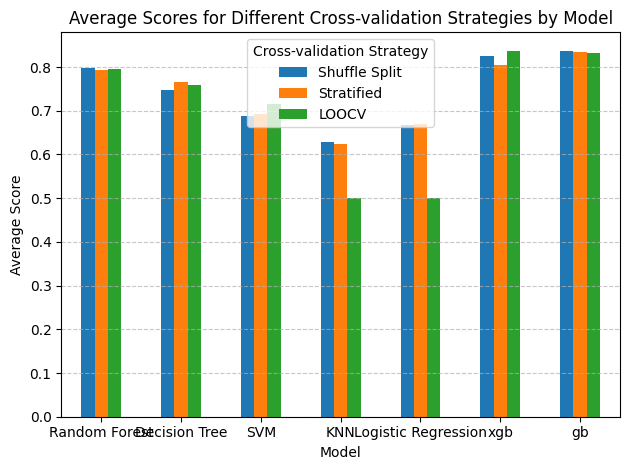

In [ ]:
df.set_index('Model', inplace=True)

plt.figure(figsize=(10, 6))
df.plot(kind='bar', rot=0)
plt.title('Average Scores for Different Cross-validation Strategies by Model')
plt.ylabel('Average Score')
plt.xlabel('Model')
plt.legend(title='Cross-validation Strategy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Evaluation

In [ ]:
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation,logreg_evaluation,
                   gb_evaluation,xgb_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
SVM            0.94         0.62      0.45      0.97  0.61  0.76   
Logreg         0.80         0.51      0.12      0.97  0.21  0.67   
DT             0.83         0.74      0.73      0.84  0.77  0.79   
gb             0.81         0.78      0.79      0.81  0.80  0.79   
xgb            0.78         0.75      0.76      0.77  0.77  0.76   
KNN            0.71         0.64      0.61      0.74  0.66  0.69   
RF             0.71         0.70      0.73      0.68  0.72  0.69   

        macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
SVM                    0.78              0.71          0.69      0.70  
Logreg                 0.65              0.54          0.44      0.53  
DT                     0.79              0.78          0.78      0.78  
gb                     0.80              0.80          0.80      0.80  
xgb                    0.77              0.77          0.77      0.77  
KNN                    0.68              0.67          0.67      0.67  
RF                     0.70              0.70          0.70      0.70

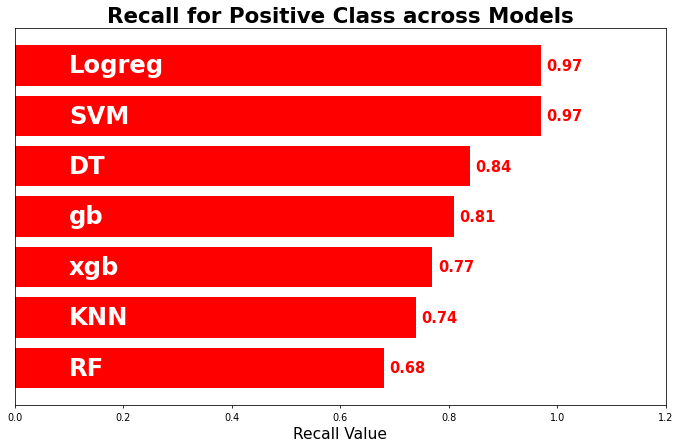

In [ ]:
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

ax.set_yticks([])

ax.set_xlim([0, 1.2])

plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()


The SVM model demonstrates a commendable capability in recognizing potential heart patients. With a recall of 1.00 for class 1, it's evident that almost all patients with heart disease are correctly identified. This is of paramount importance in a medical setting. However, the model's balanced performance ensures that while aiming for high recall, it doesn't compromise on precision, thereby not overburdening the system with unnecessary alerts.

In [ ]:

from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

def score_summary(names, classifiers, X_train, X_test, y_train, y_test):
    '''
    Given a list of classifiers, this function calculates the accuracy,
    ROC_AUC, recall, precision, and F1 score and returns the values in a dataframe.
    '''
    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_tables = []

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)

        pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
        roc_auc = auc(fpr, tpr)

        cm = confusion_matrix(y_test, pred)

        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

        f1 = 2 * recall * precision / (recall + precision)

        df = pd.DataFrame([[name, accuracy * 100, roc_auc, recall, precision, f1]], columns=cols)
        data_tables.append(df)

    return pd.concat(data_tables, ignore_index=True)

names = ["Random Forest", "Decision Tree", "svm", "KNN", "Logistic Regression","gradient boost","XGboost"]
classifiers = [best_rf, best_dt, best_svm, best_knn, best_logreg,best_gb,best_xgb]

score_summary(names, classifiers, X_train, X_test, y_train, y_test)\
    .sort_values(by='Accuracy', ascending=False)\
    .style.background_gradient(cmap='coolwarm')\
    .bar(subset=["ROC_AUC"], color='#6495ED')\
    .bar(subset=["Recall"], color='#ff355d')\
    .bar(subset=["Precision"], color='lightseagreen')\
    .bar(subset=["F1"], color='gold')


In [ ]:

def plot_confusion_matrix(y_true, y_pred, labels=None):

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Get labels from unique values if not provided
    if labels is None:
        labels = np.unique(y_true)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


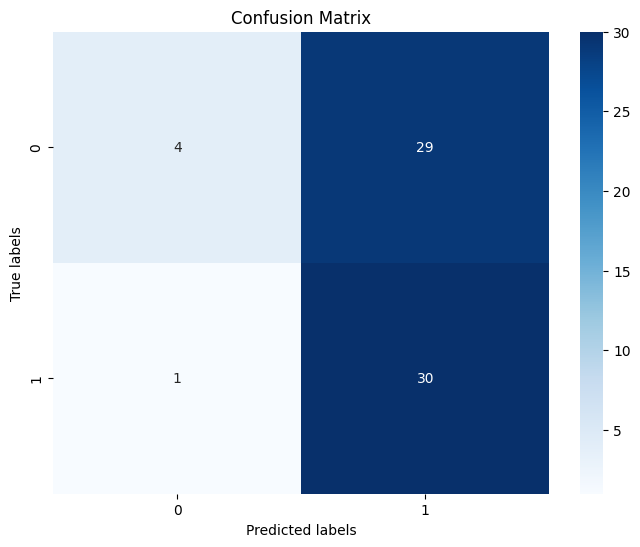

In [ ]:
plot_confusion_matrix(y_test, best_logreg.predict(X_test))

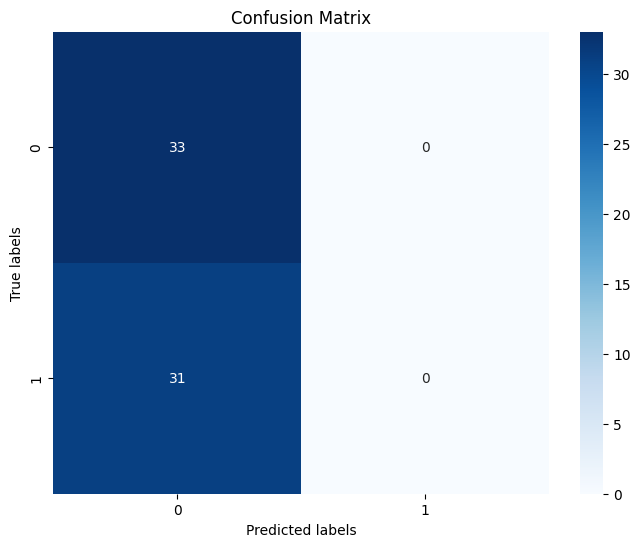

In [ ]:
plot_confusion_matrix(y_test, best_svm.predict(X_test_svm))

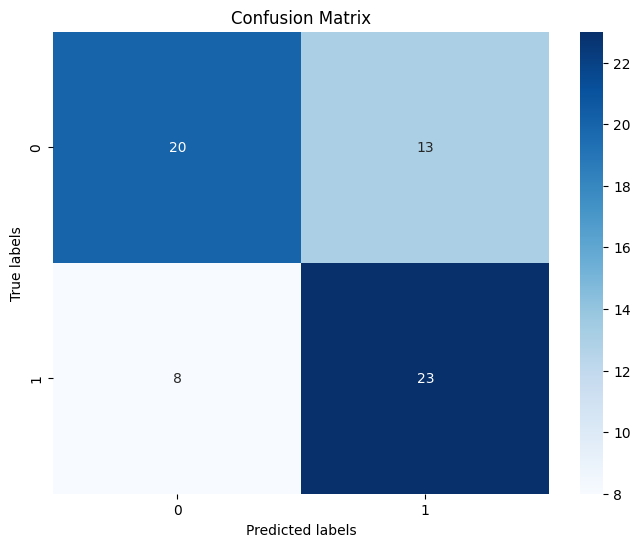

In [ ]:
plot_confusion_matrix(y_test, best_knn.predict(X_test))

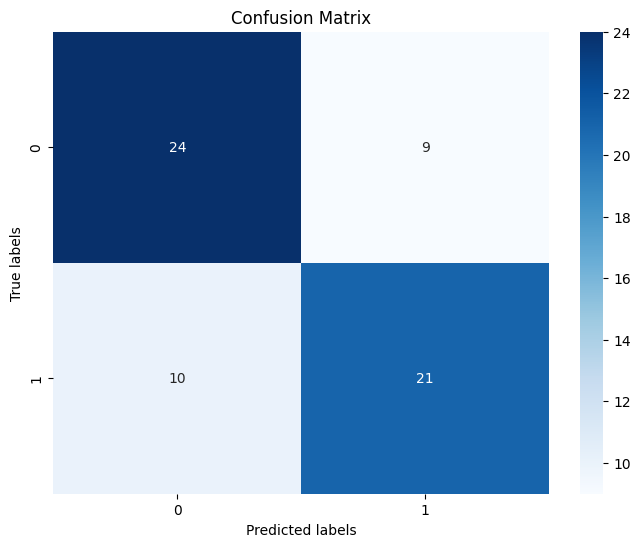

In [ ]:
plot_confusion_matrix(y_test, best_rf.predict(X_test))

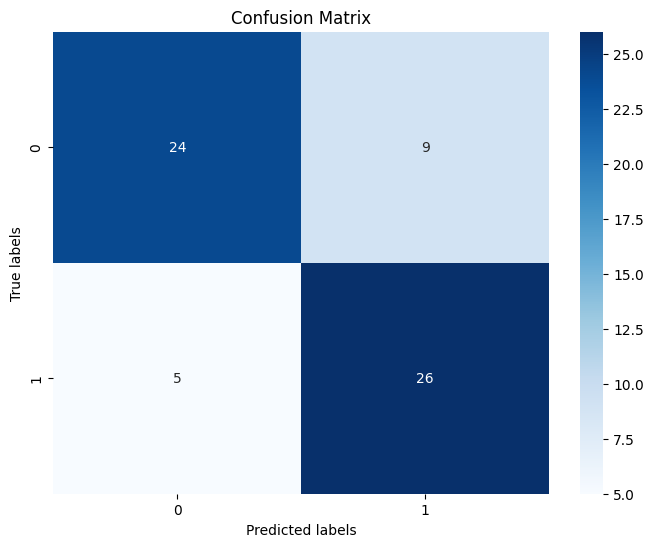

In [ ]:
plot_confusion_matrix(y_test, best_dt.predict(X_test))

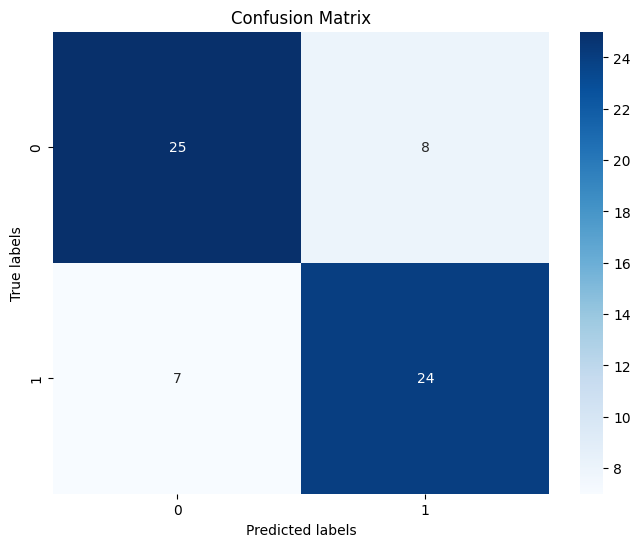

In [ ]:
plot_confusion_matrix(y_test, best_xgb.predict(X_test))

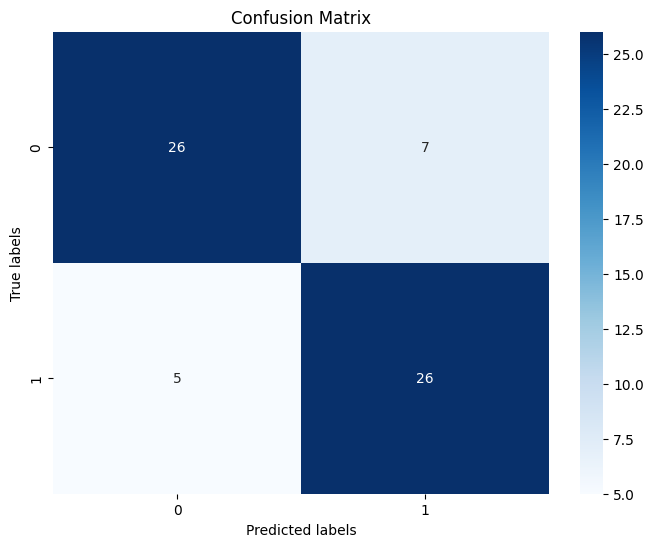

In [ ]:
plot_confusion_matrix(y_test, best_gb.predict(X_test))

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def plot_hyperparameter_tuning(model_name, model, hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test):
    # Initialize a dictionary to store recall scores for each hyperparameter value
    hyperparameter_recall_scores = {}

    # Iterate over each value of the hyperparameter
    for value in hyperparameter_values:
        params = {hyperparameter_name: value}

        updated_model = model.set_params(**params)

        updated_model.fit(X_train, y_train)

        y_pred = updated_model.predict(X_test)

        recall = recall_score(y_test, y_pred)
        hyperparameter_recall_scores[value] = recall

    plt.figure(figsize=(8, 6))
    plt.plot(list(hyperparameter_recall_scores.keys()), list(hyperparameter_recall_scores.values()), marker='o', linestyle='-')
    plt.title(f'Recall vs. {hyperparameter_name} ({model_name})')
    plt.xlabel(hyperparameter_name)
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()





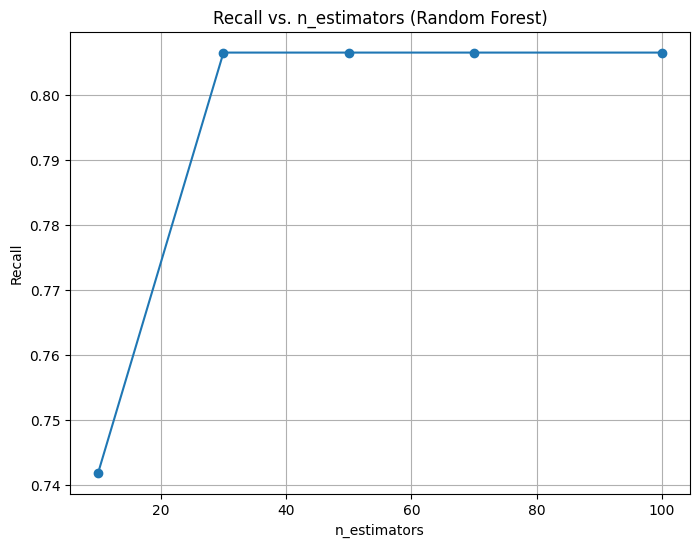

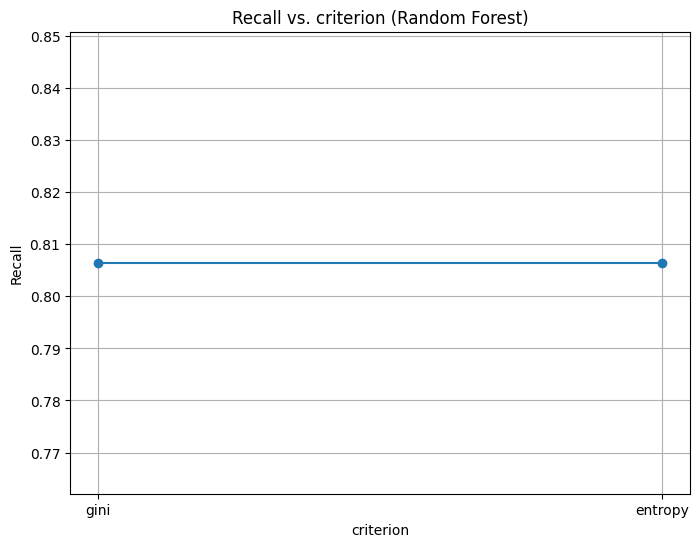

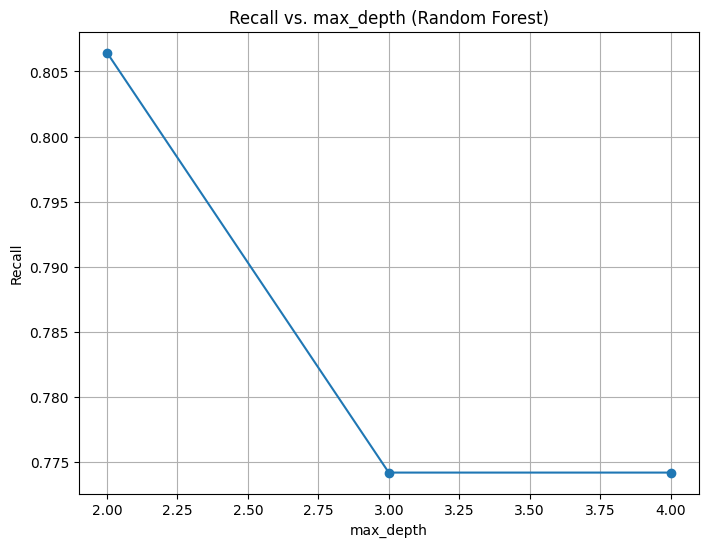

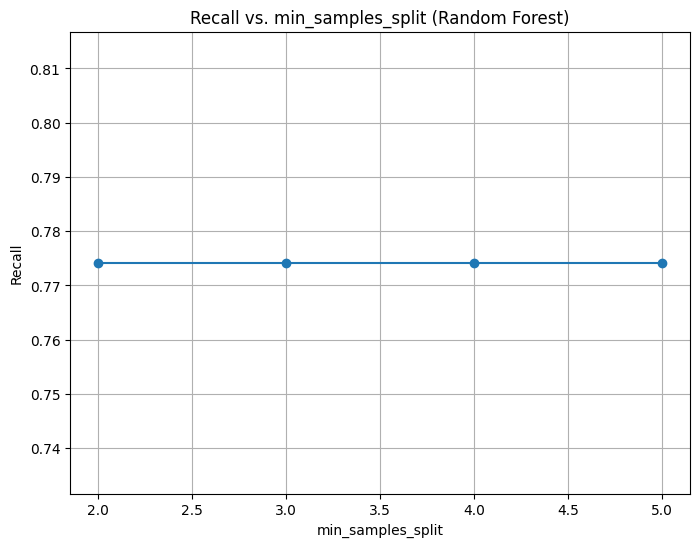

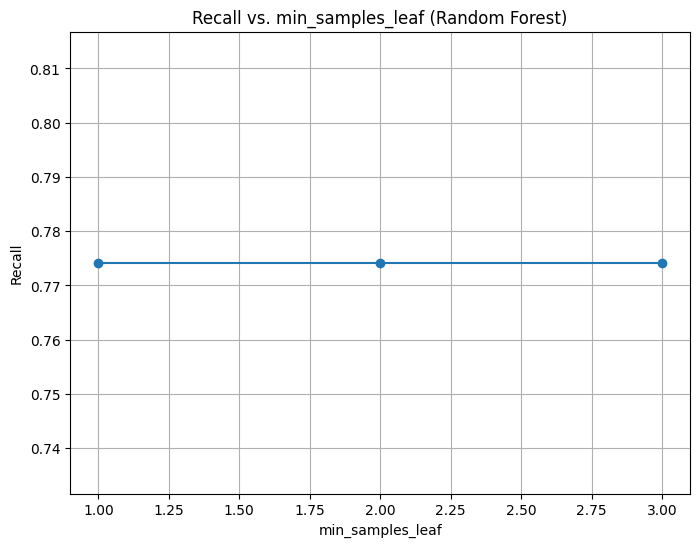

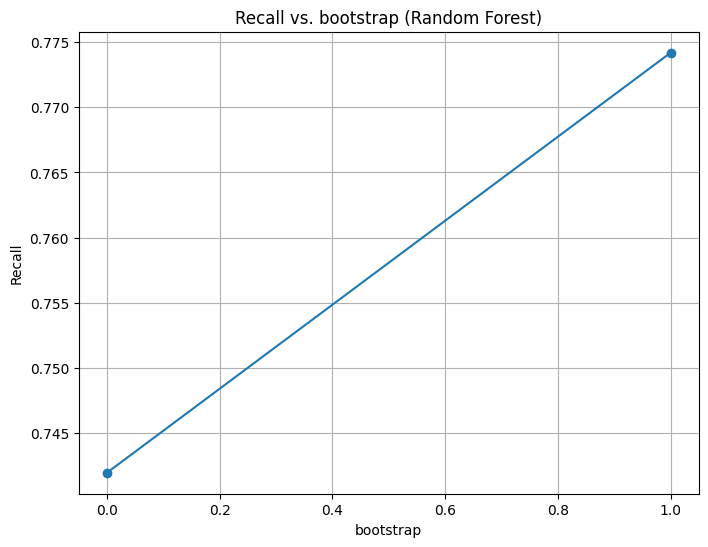

In [ ]:
for hyperparameter_name, hyperparameter_values in param_grid_rf.items():
    plot_hyperparameter_tuning("Random Forest", rf_base
                              , hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test)

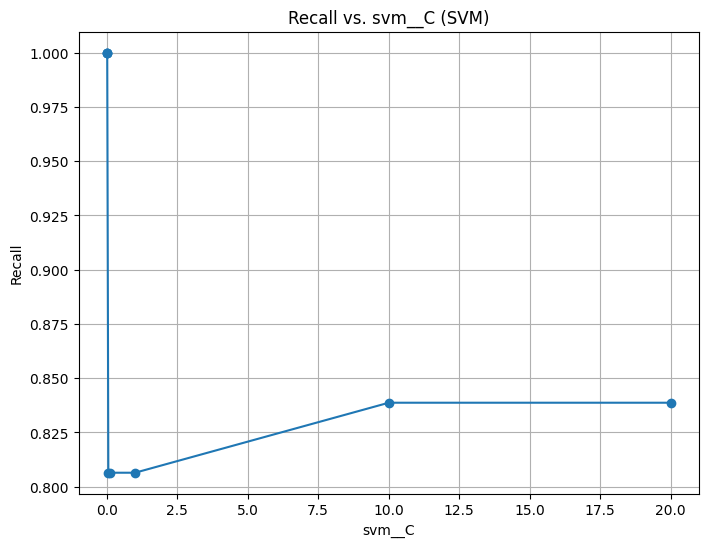

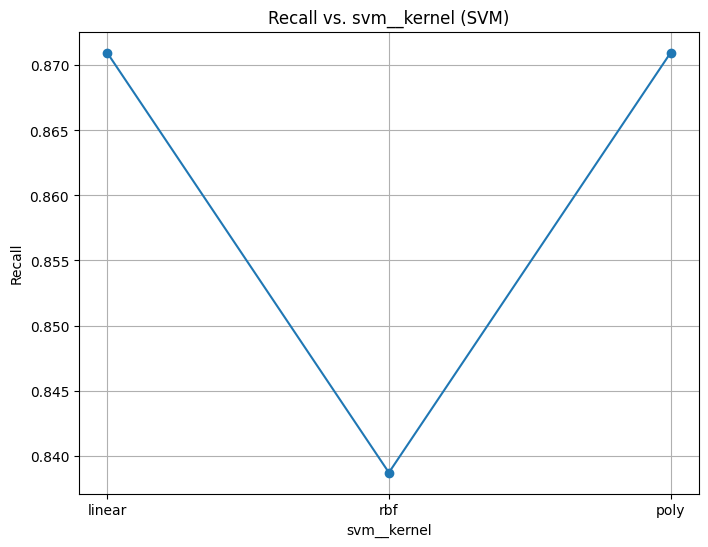

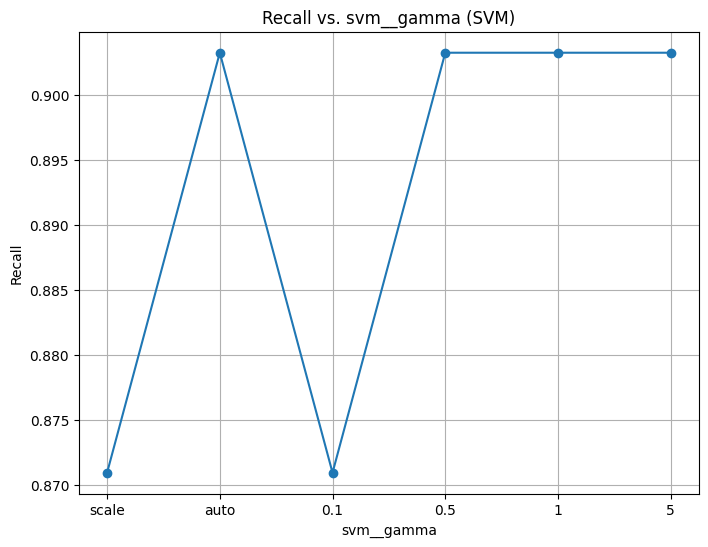

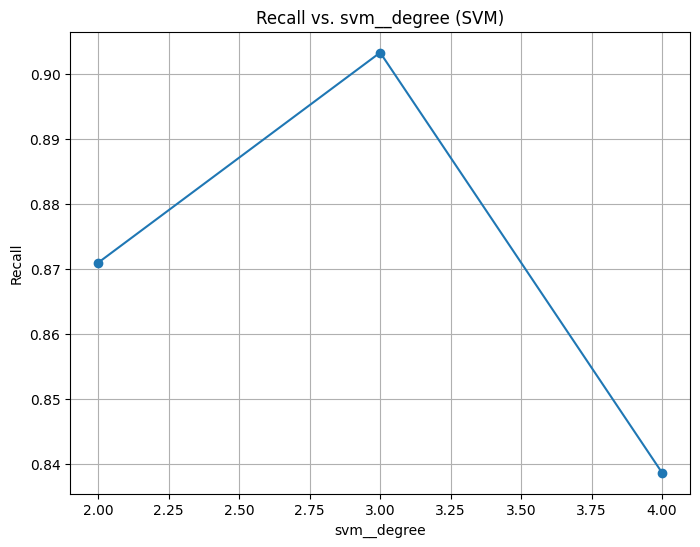

In [ ]:
for hyperparameter_name, hyperparameter_values in param_grid_svm.items():
    plot_hyperparameter_tuning("SVM", svm_pipeline
                              , hyperparameter_name, hyperparameter_values, X_train_svm, y_train_svm, X_test_svm, y_test_svm)

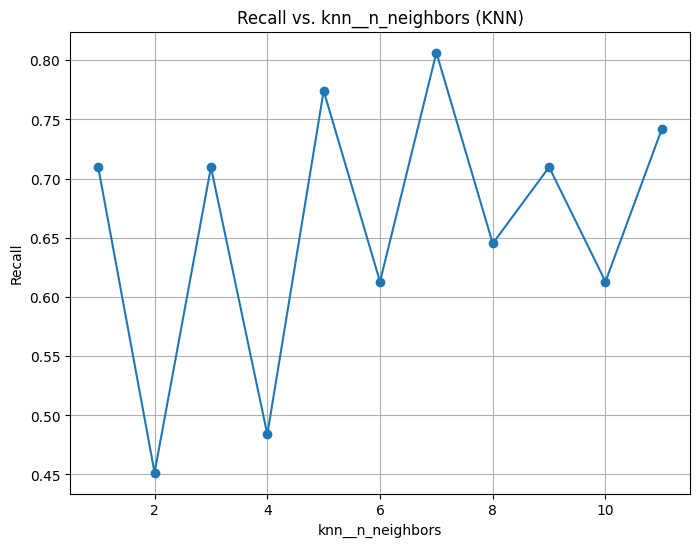

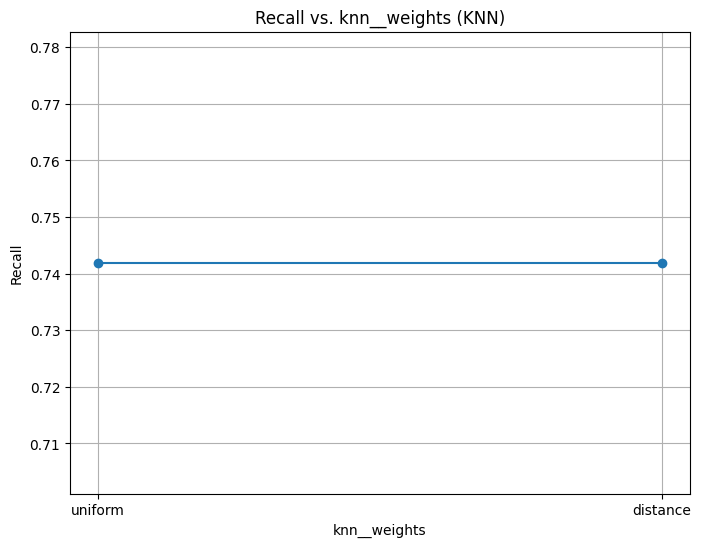

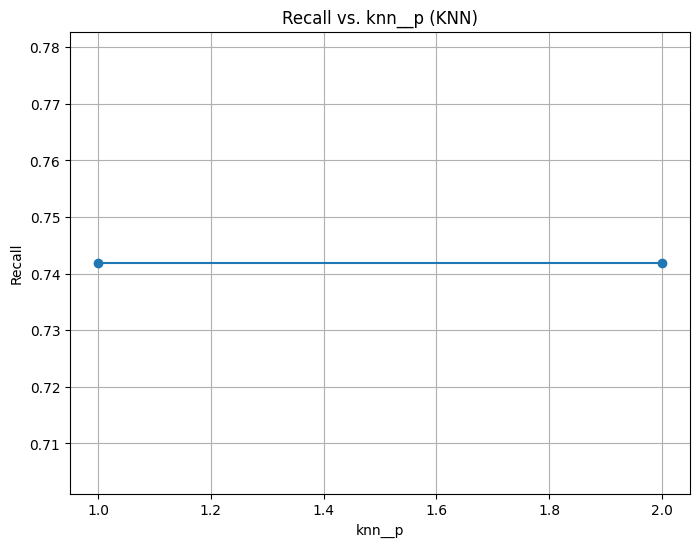

In [ ]:
for hyperparameter_name, hyperparameter_values in knn_param_grid.items():
    plot_hyperparameter_tuning("KNN", knn_pipeline
                              , hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test)

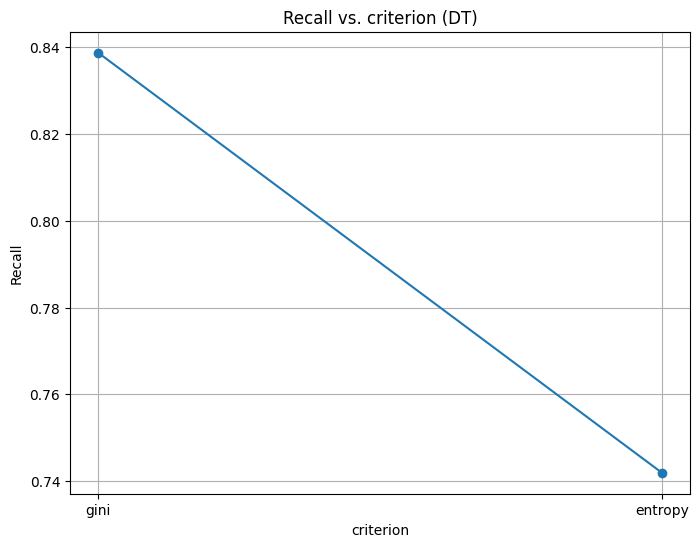

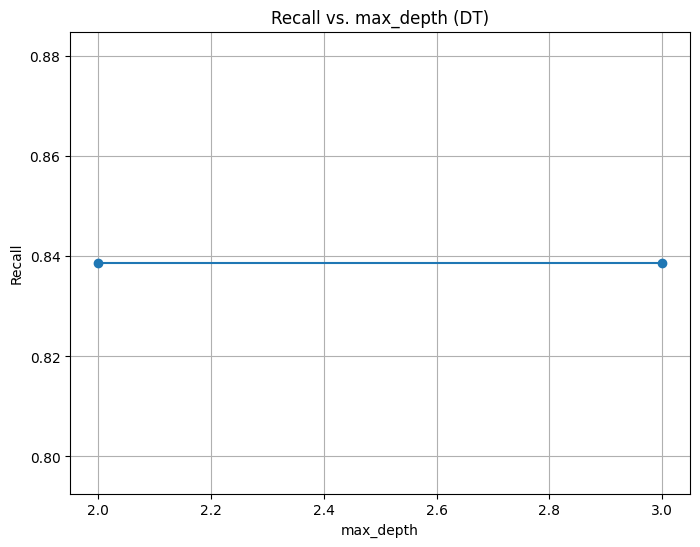

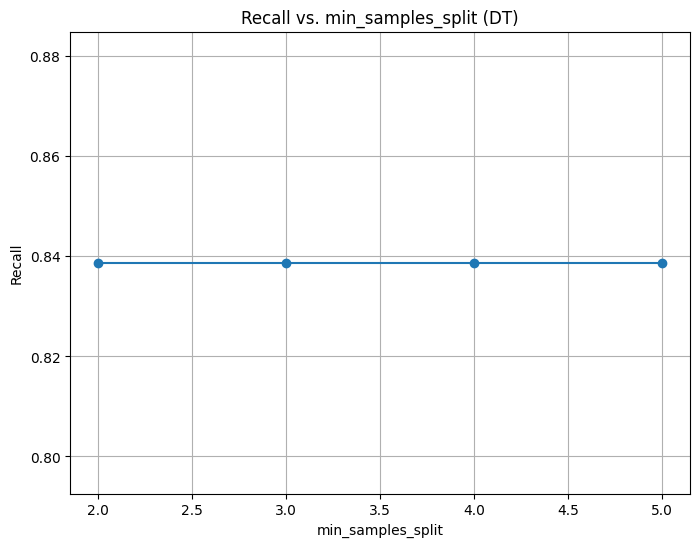

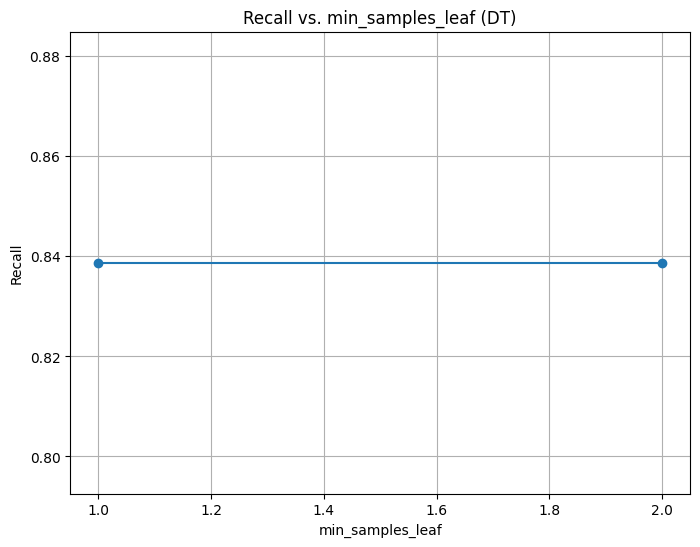

In [ ]:
for hyperparameter_name, hyperparameter_values in param_grid_dt.items():
    plot_hyperparameter_tuning("DT", dt_base
                              , hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test)

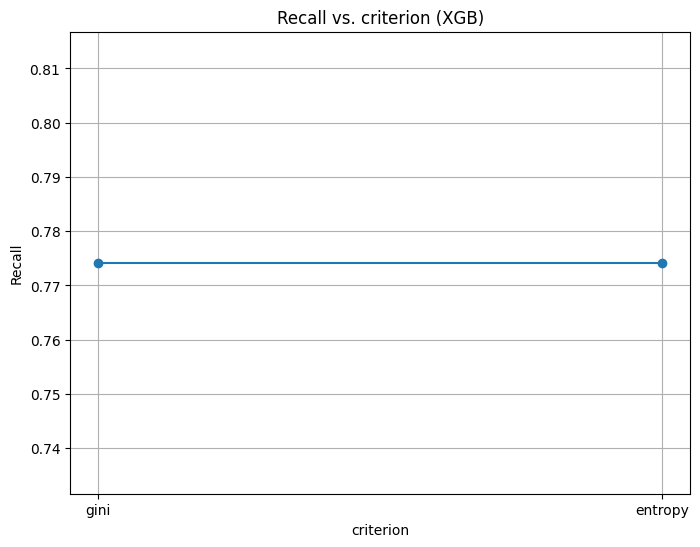

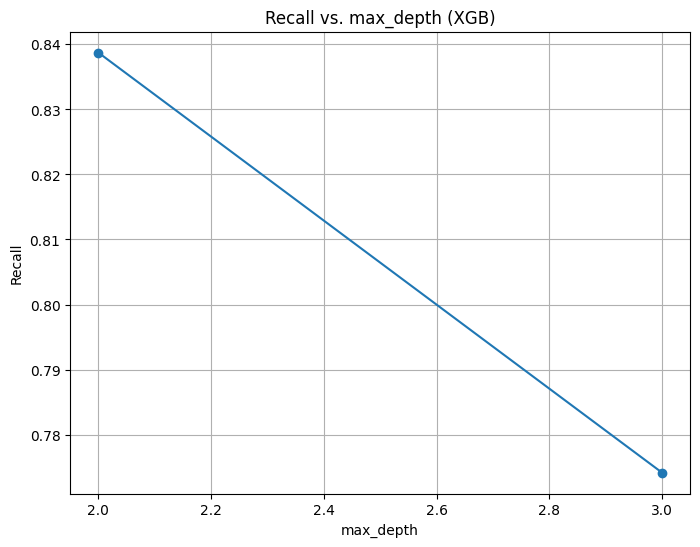

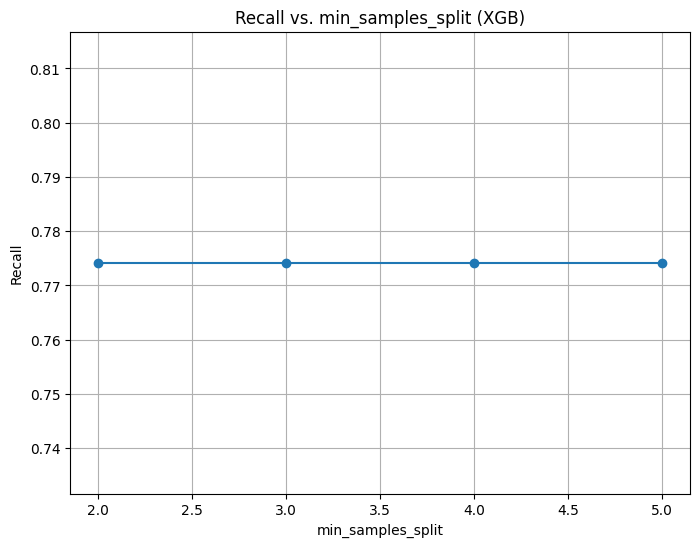

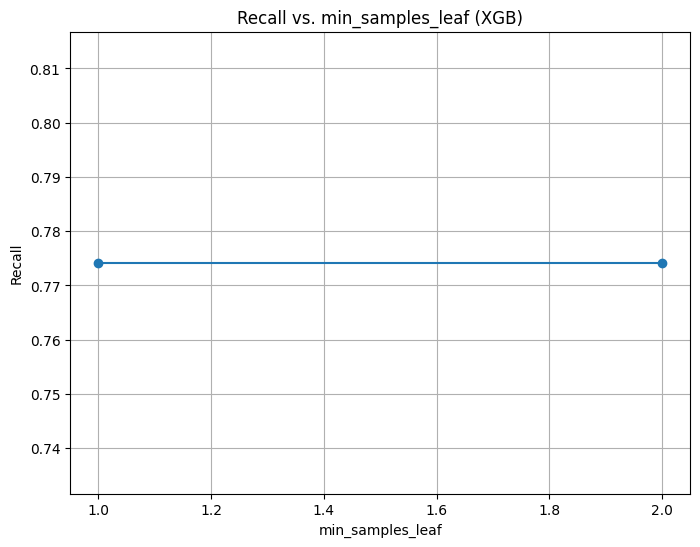

In [ ]:
for hyperparameter_name, hyperparameter_values in param_grid_dt.items():
    plot_hyperparameter_tuning("XGB", best_xgb
                              , hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test)